# Documentation

### Objectives
**There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.** <br><br>
**Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

### Description
**age**	: age of a person <br><br>
**job**	: type of job *('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')* <br><br>
**marital**	: marital status *('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)* <br><br>
**education** : 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'* <br><br>
**default**	: has credit in default? *('no','yes','unknown')* <br><br>
**housing**	: has housing loan? *('no','yes','unknown')* <br><br>
**loan** : has personal loan? *('no','yes','unknown')* <br><br>
**contact**	: contact communication type *('cellular','telephone')* <br><br>
**month** : last contact month of year *('jan', 'feb', 'mar', …, 'nov', 'dec')* <br><br>
**day_of_week**	: last contact day of the week *('mon','tue','wed','thu','fri')* <br><br>
**duration** : last contact duration, in seconds. <br><br>
**campaign** : number of contacts performed during this campaign and for this client *(includes last contact)* <br><br>
**pdays** : number of days that passed by after the client was last contacted from a previous campaign *(999 means client was not previously contacted)* <br><br>
**previous** : number of contacts performed before this campaign and for this client <br><br>
**poutcome** : outcome of the previous marketing campaign *('failure','nonexistent','success')* <br><br>
**y** : has the client subscribed a term deposit? *('yes','no')*

SOURCE : https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification?select=new_train.csv

# Import data

In [274]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [276]:
df = pd.read_csv('BankingDataset.csv')

In [277]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


There are no null values in the dataset.

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


# Exploratory Data Analysis

<AxesSubplot:xlabel='y', ylabel='count'>

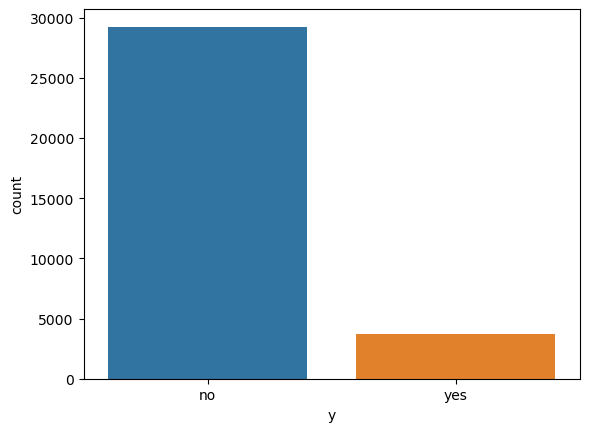

In [279]:
sns.countplot(x='y',data=df)

The result below shows that approximately 11.27 percent of the total people in the dataset subscribe to a term deposit.

In [280]:
df[df['y'] == 'yes'].shape[0]/df.shape[0] *100

11.265553869499241

In [281]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [282]:
df.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


**To visualize all the data that is an number type.**

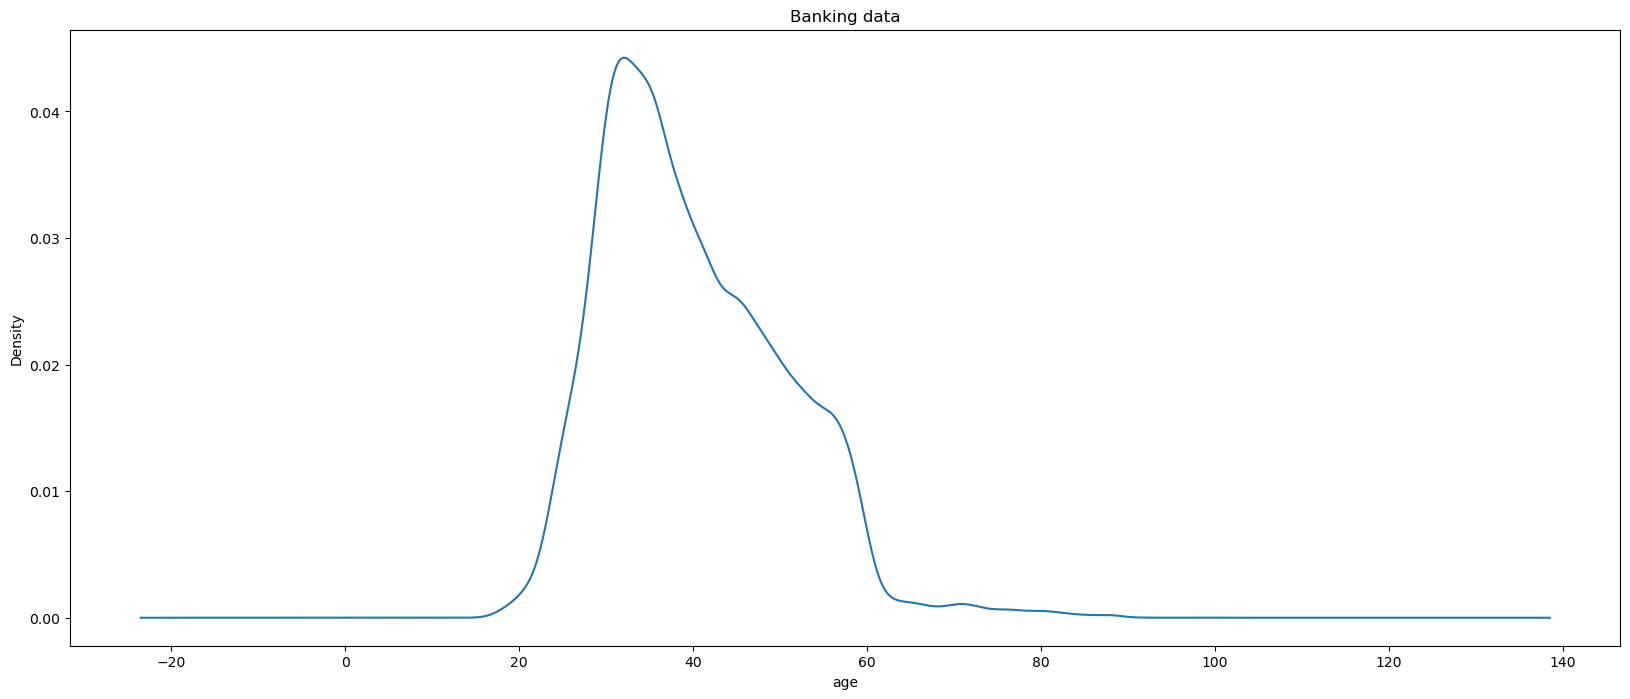

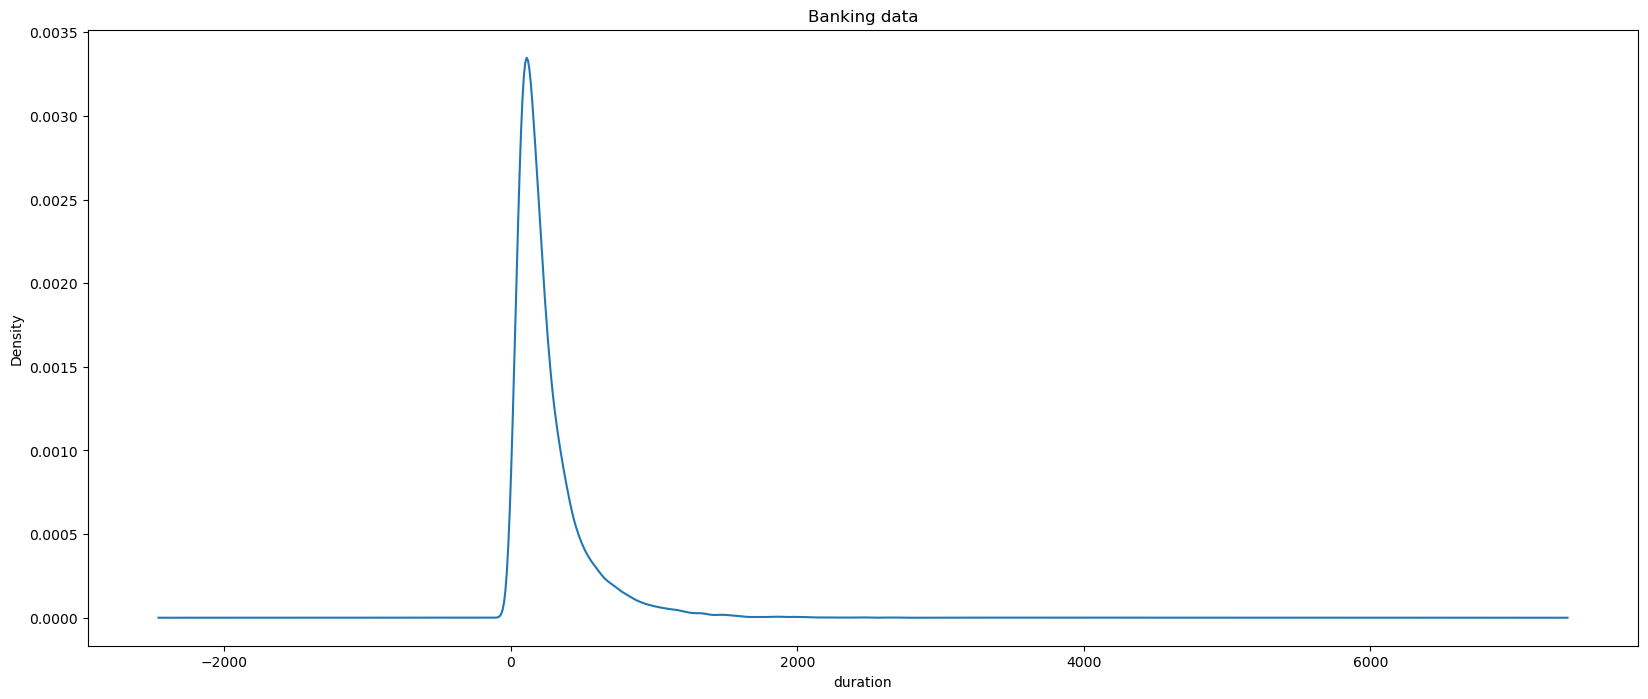

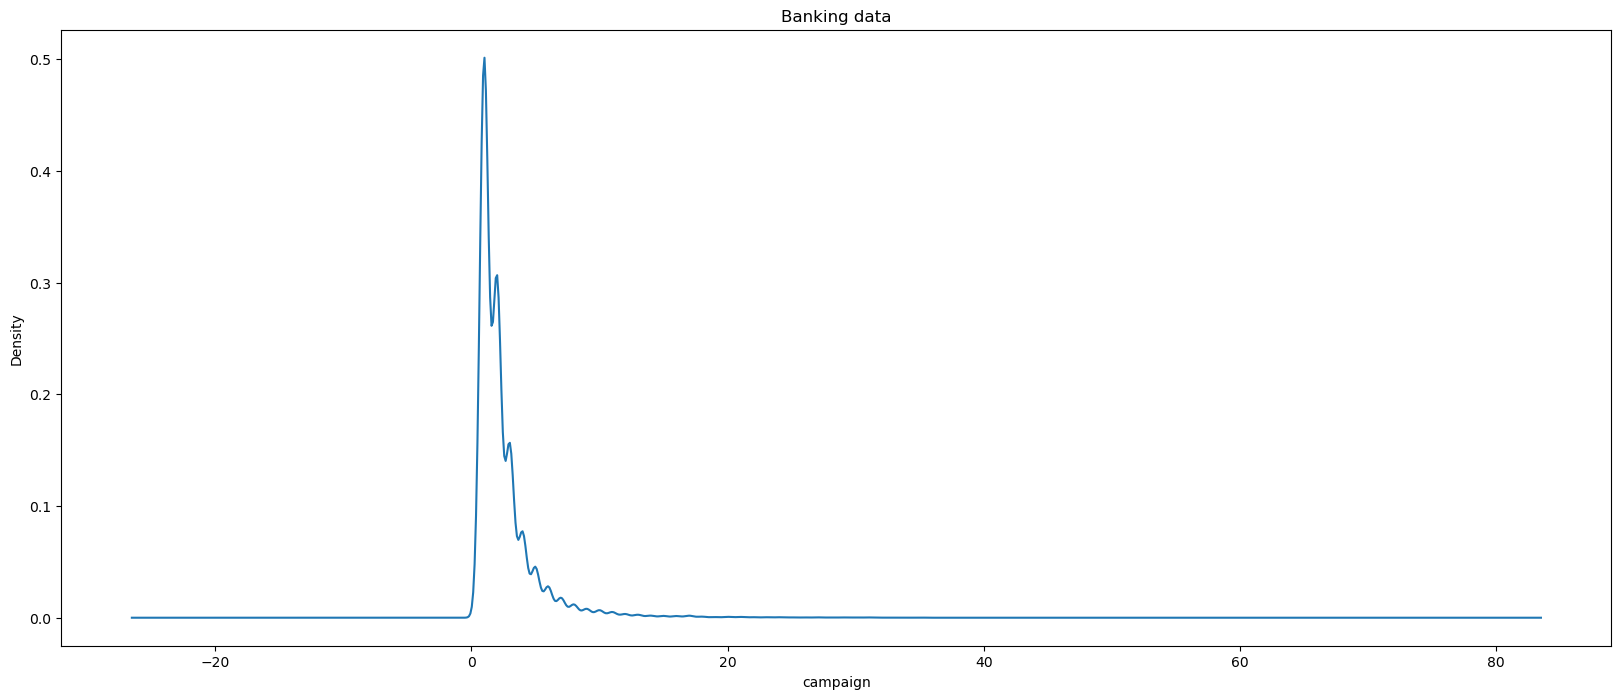

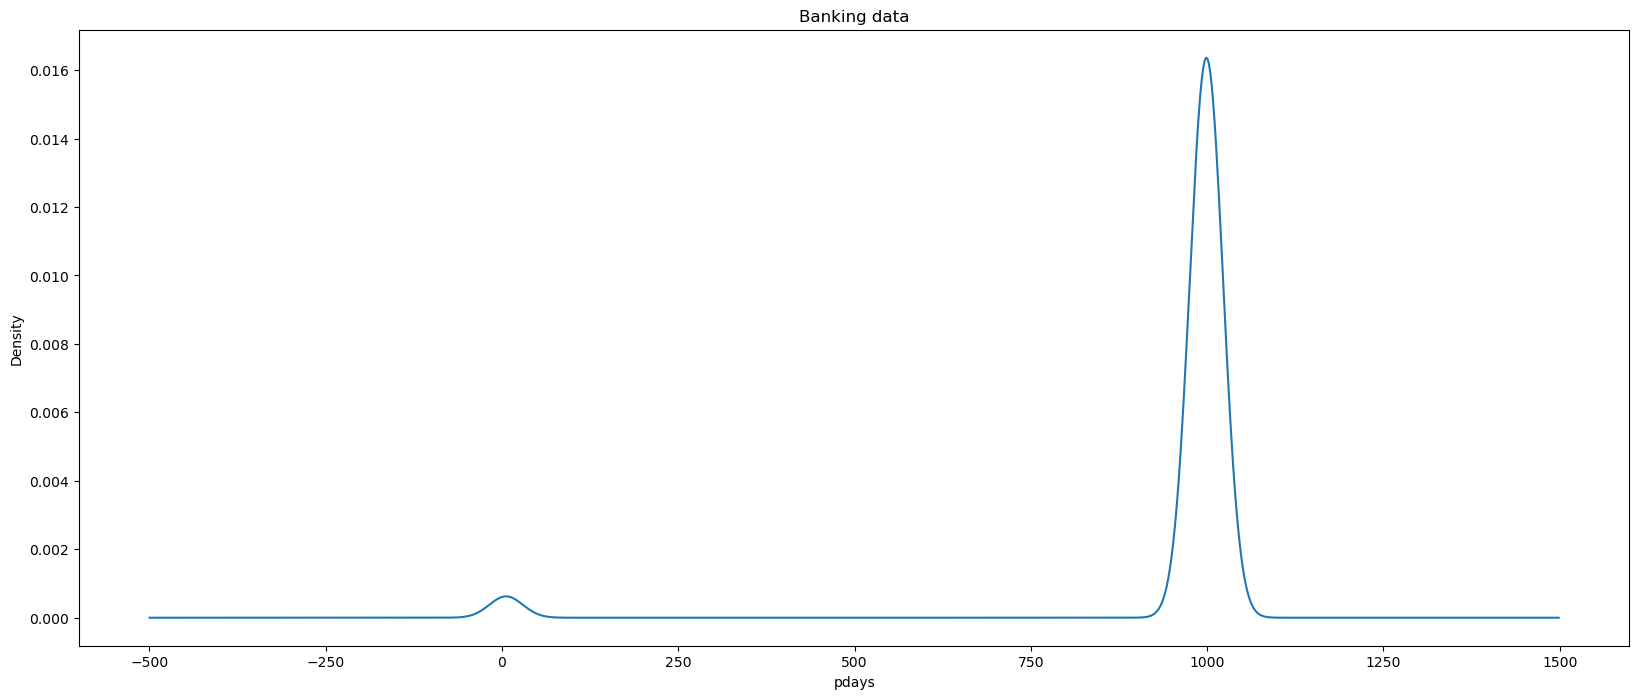

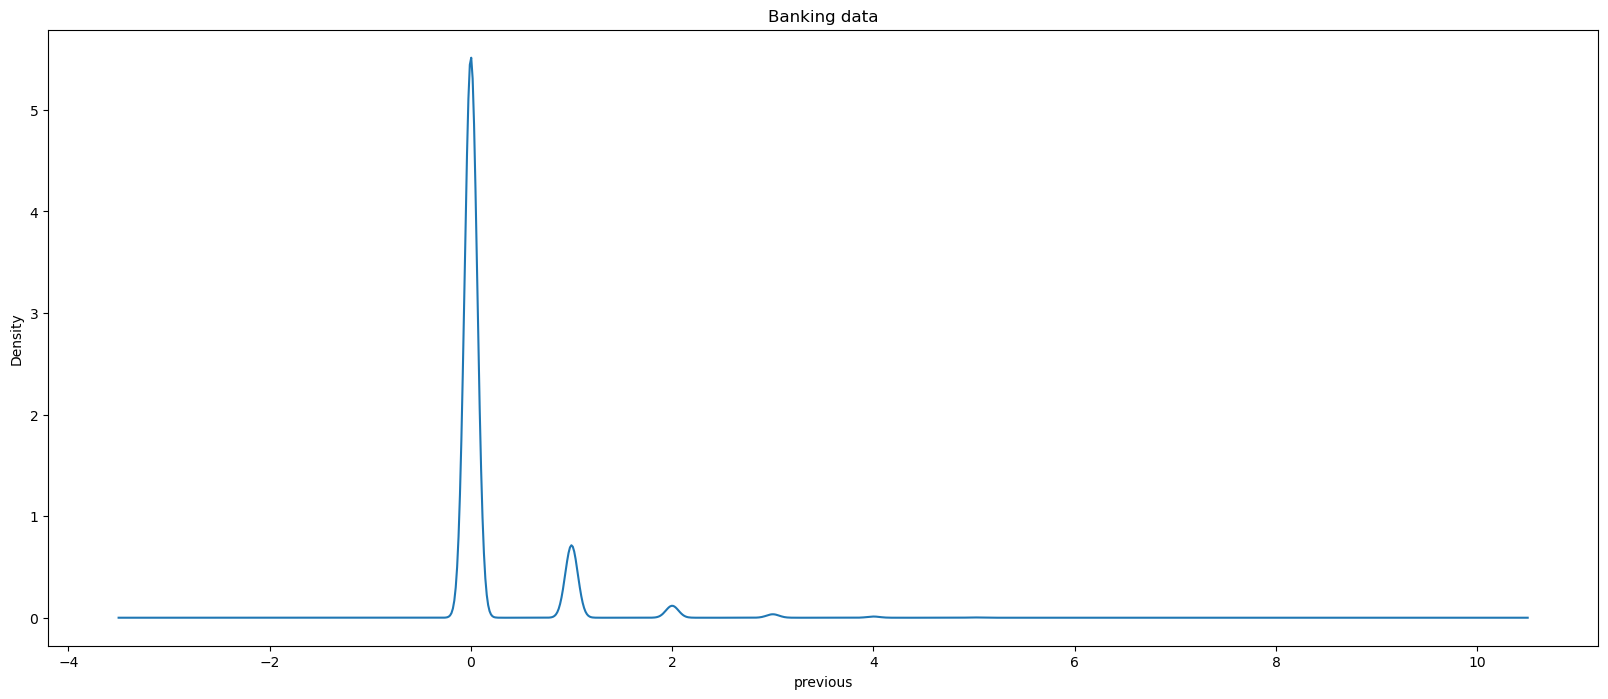

In [283]:
numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(20,8))
    df[column].plot(kind='kde', label=column)
    plt.xlabel(column)
    plt.title('Banking data')

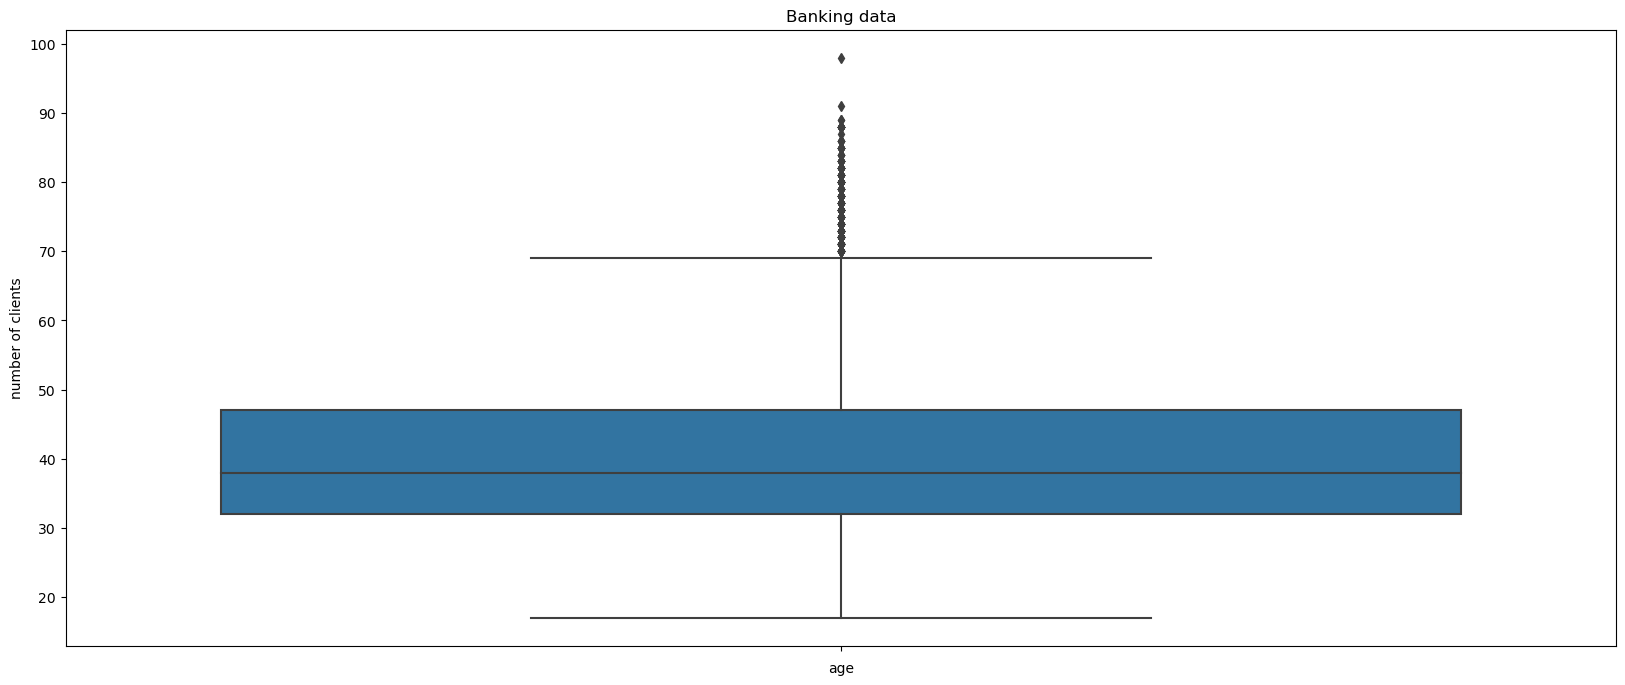

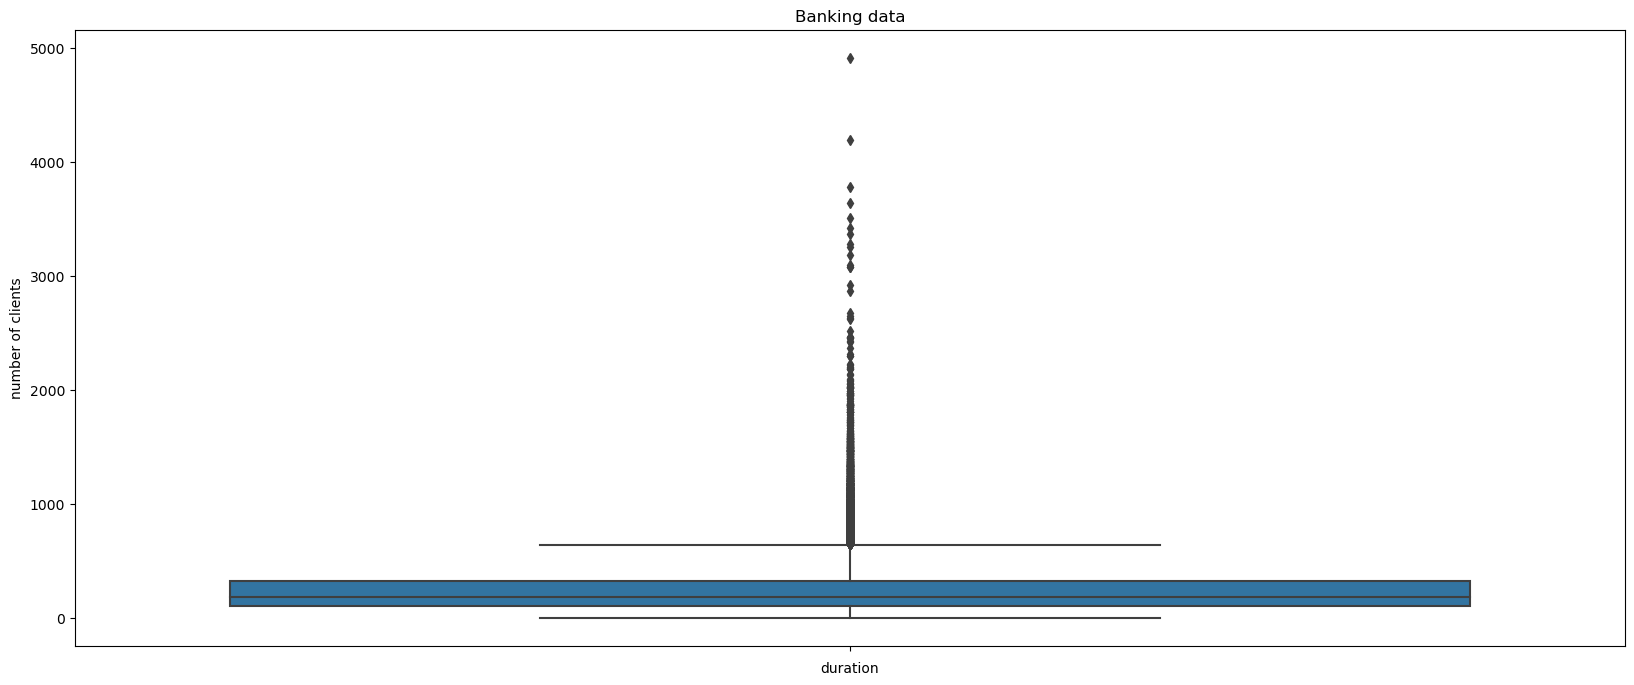

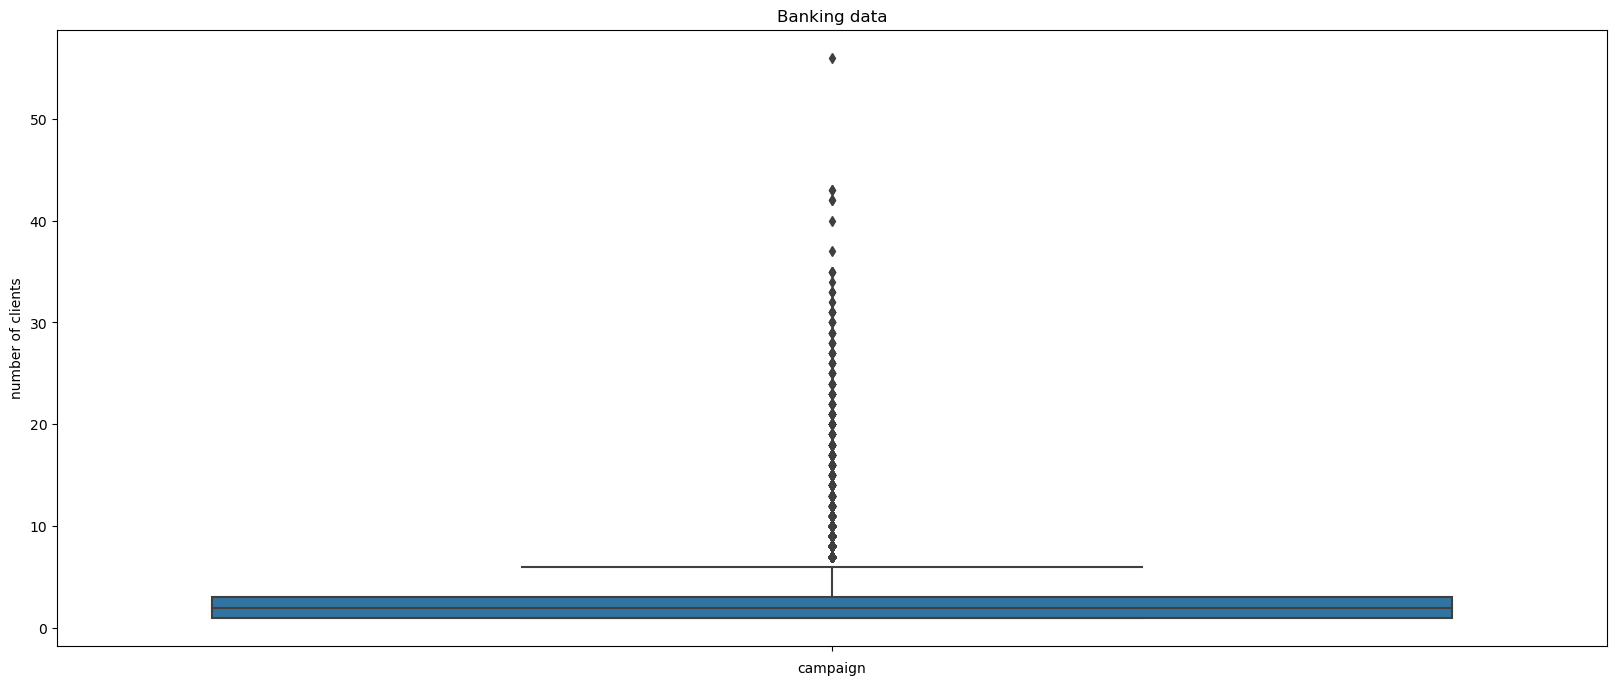

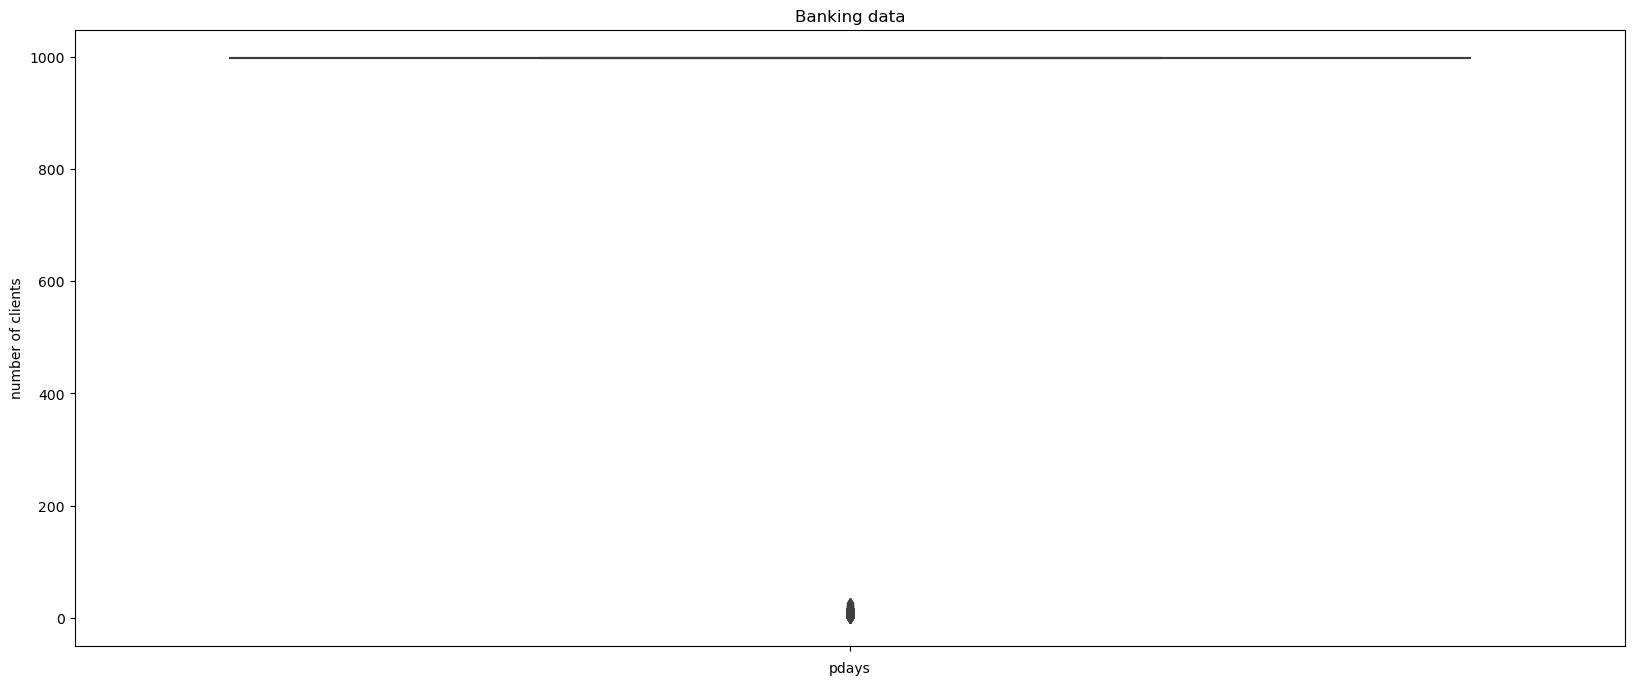

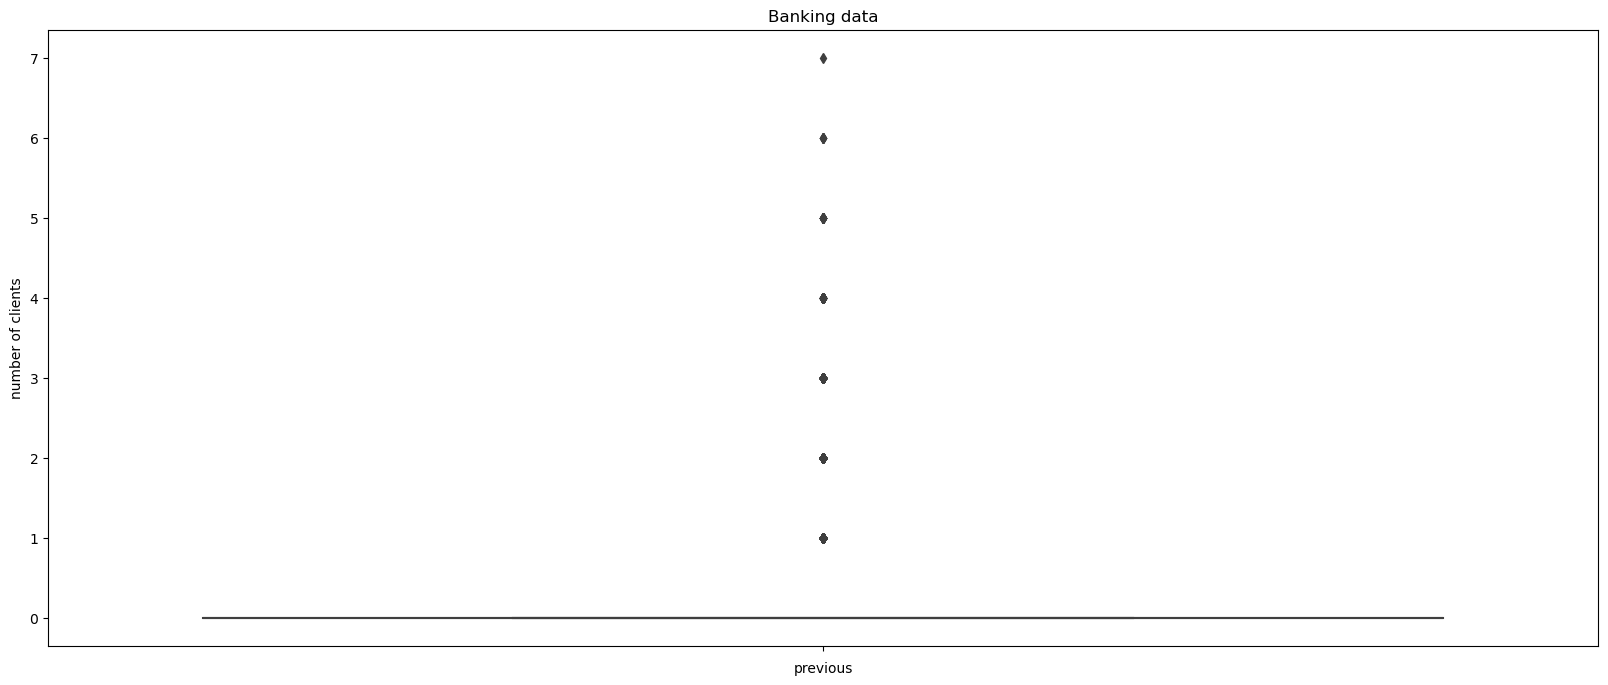

In [284]:
for column in numeric_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(data=df, y=column)
    plt.xlabel(column)
    plt.ylabel('number of clients')
    plt.title('Banking data')

**Conclusion from the above graphs:** <br>
- It can be seen from KDE plots that ages, duration, campaign, pdays, and previous are skewed.
- From boxplots, there are so many outliers in these columns.

**To visualize all the data that is an object type.**

In [285]:
# Select the data object type
object_columns = df.select_dtypes(include='object').columns

print(object_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


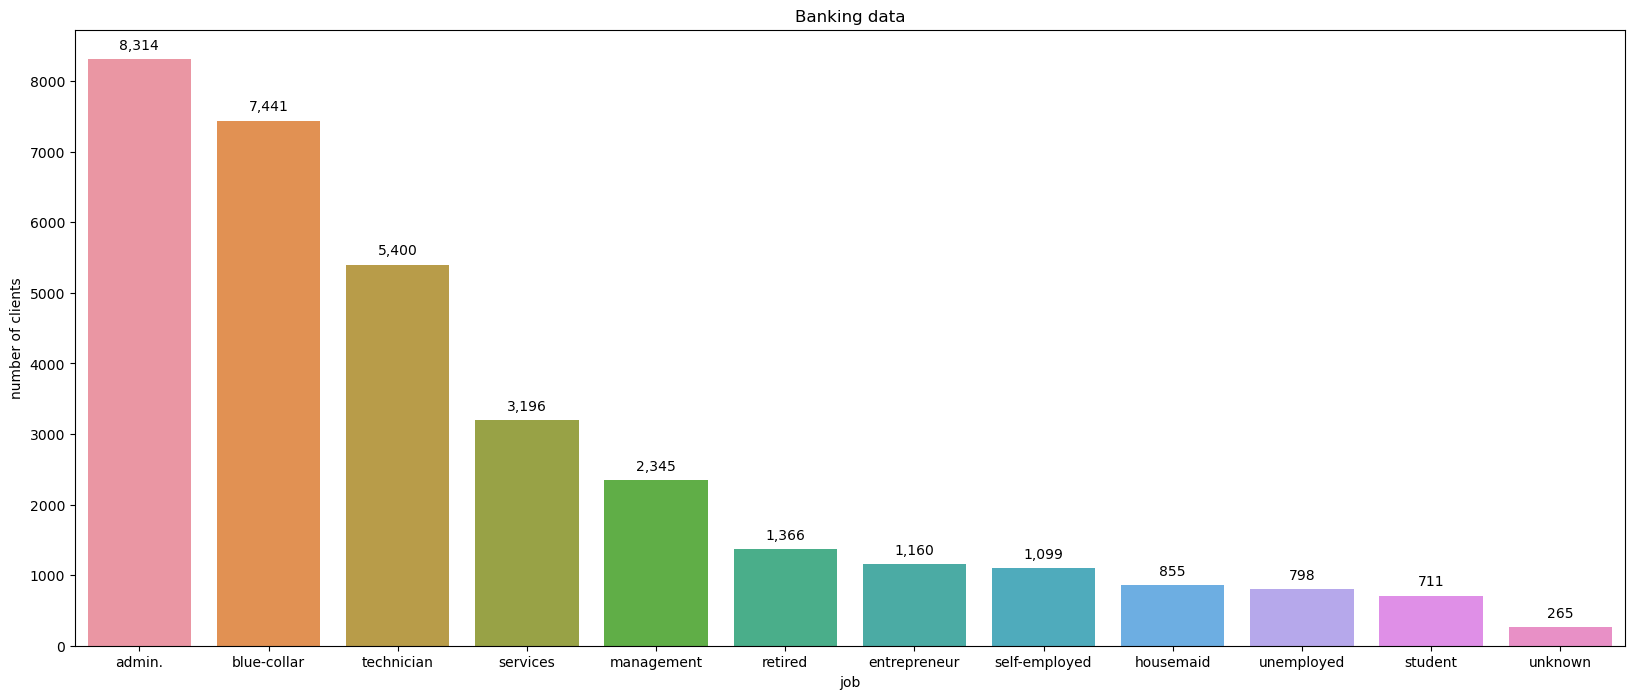

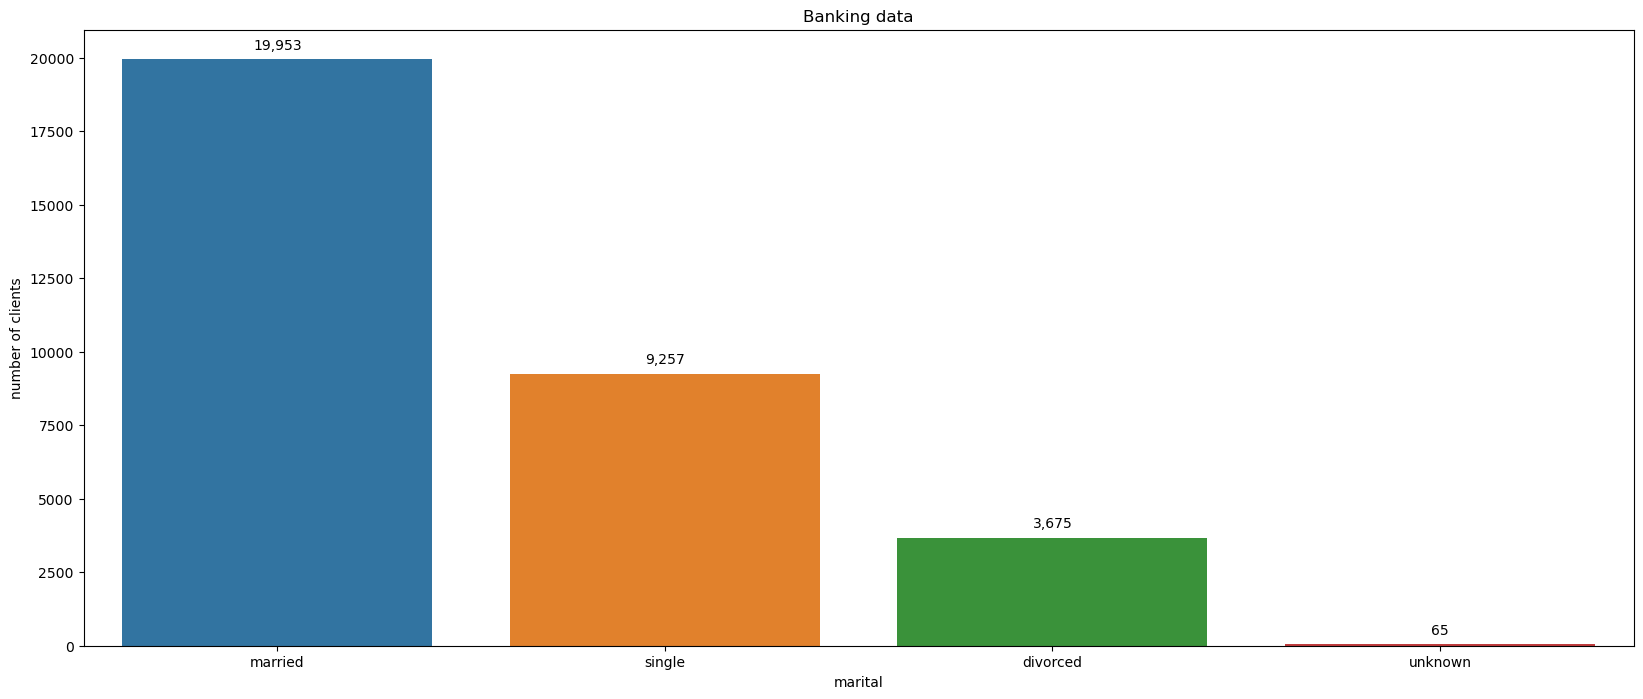

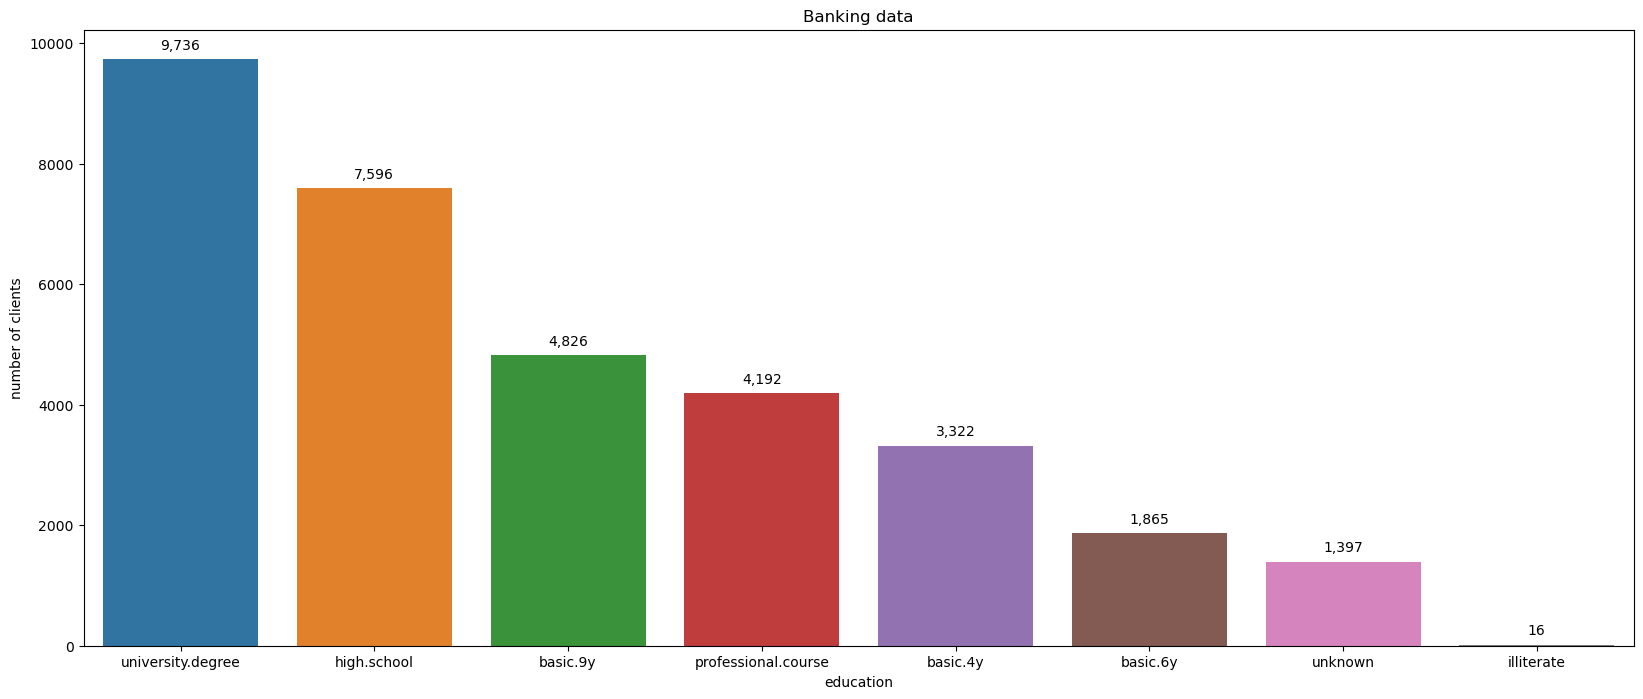

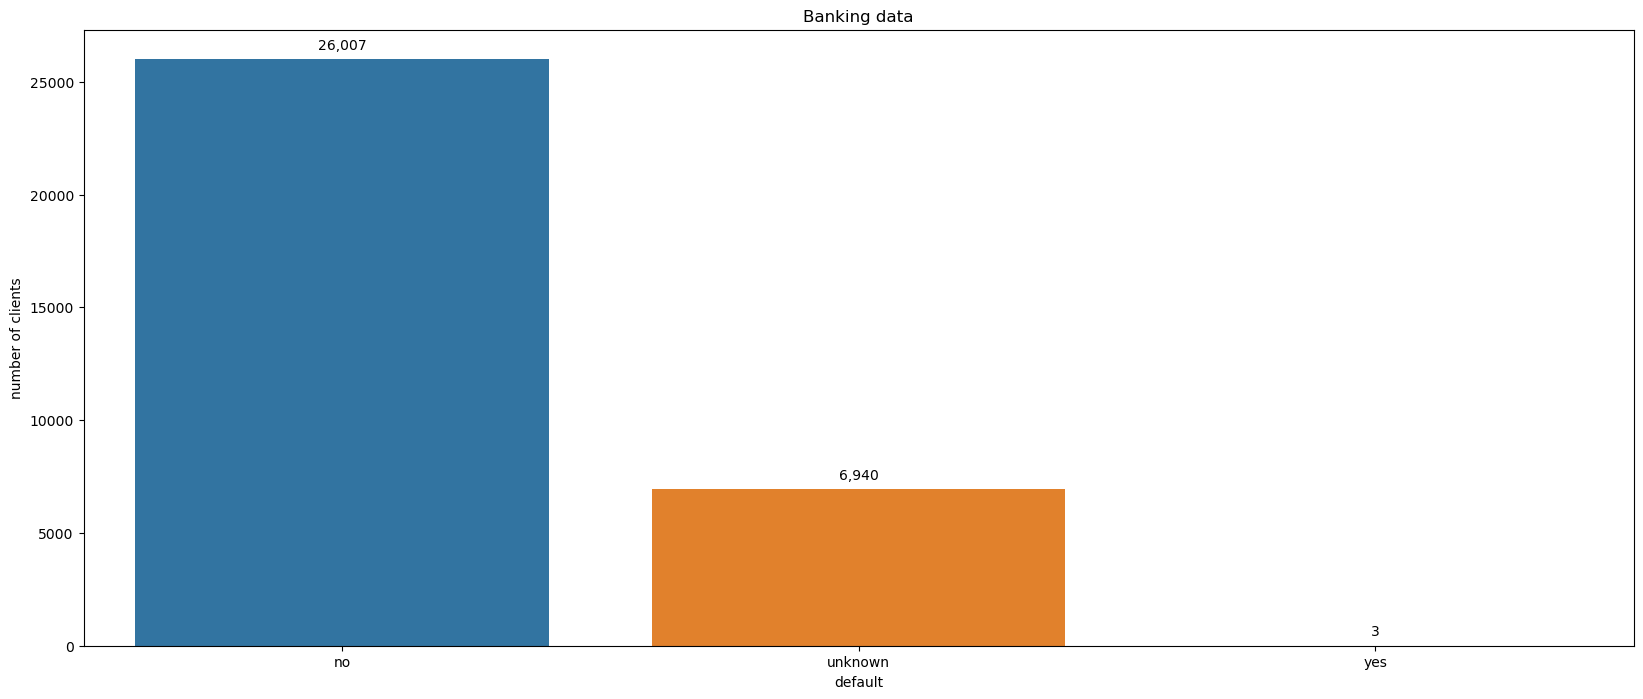

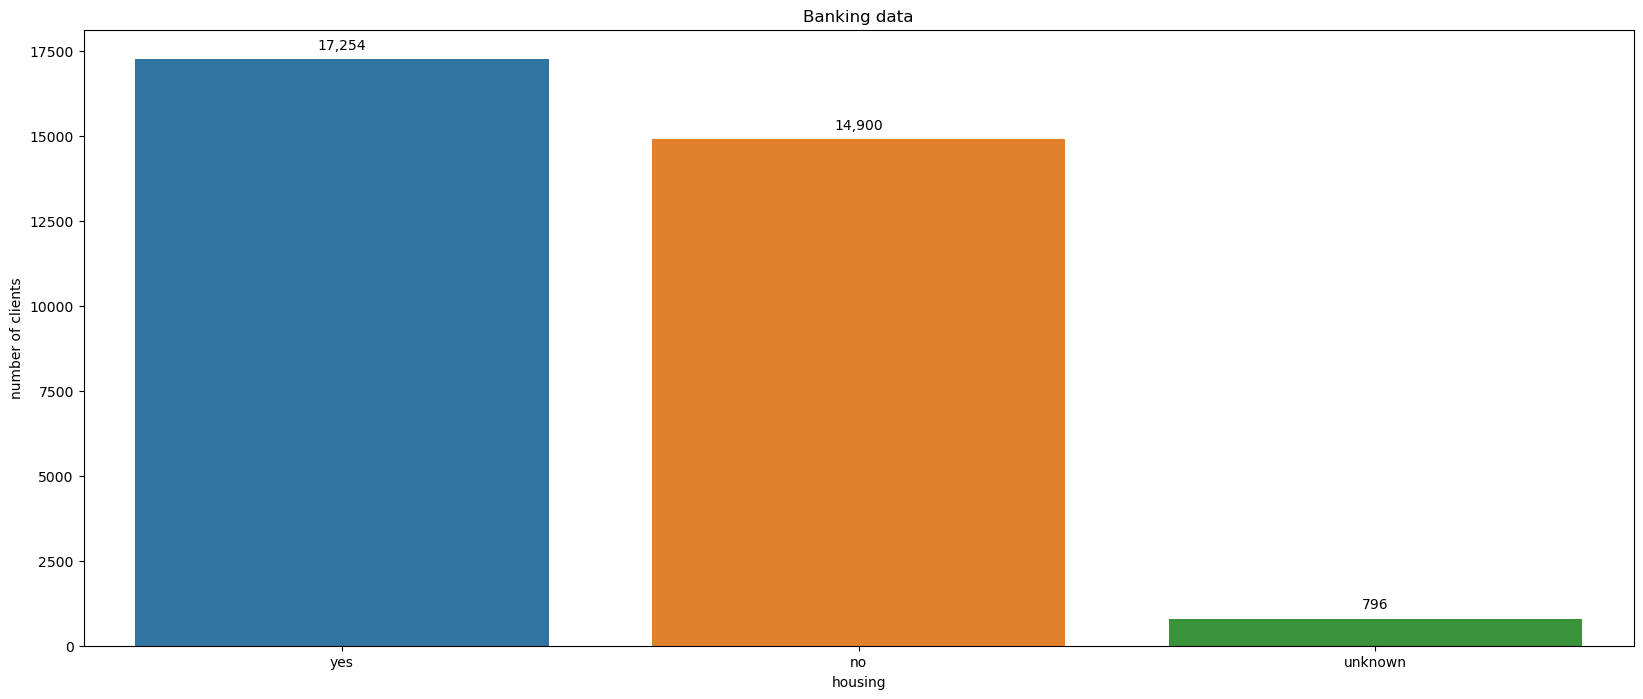

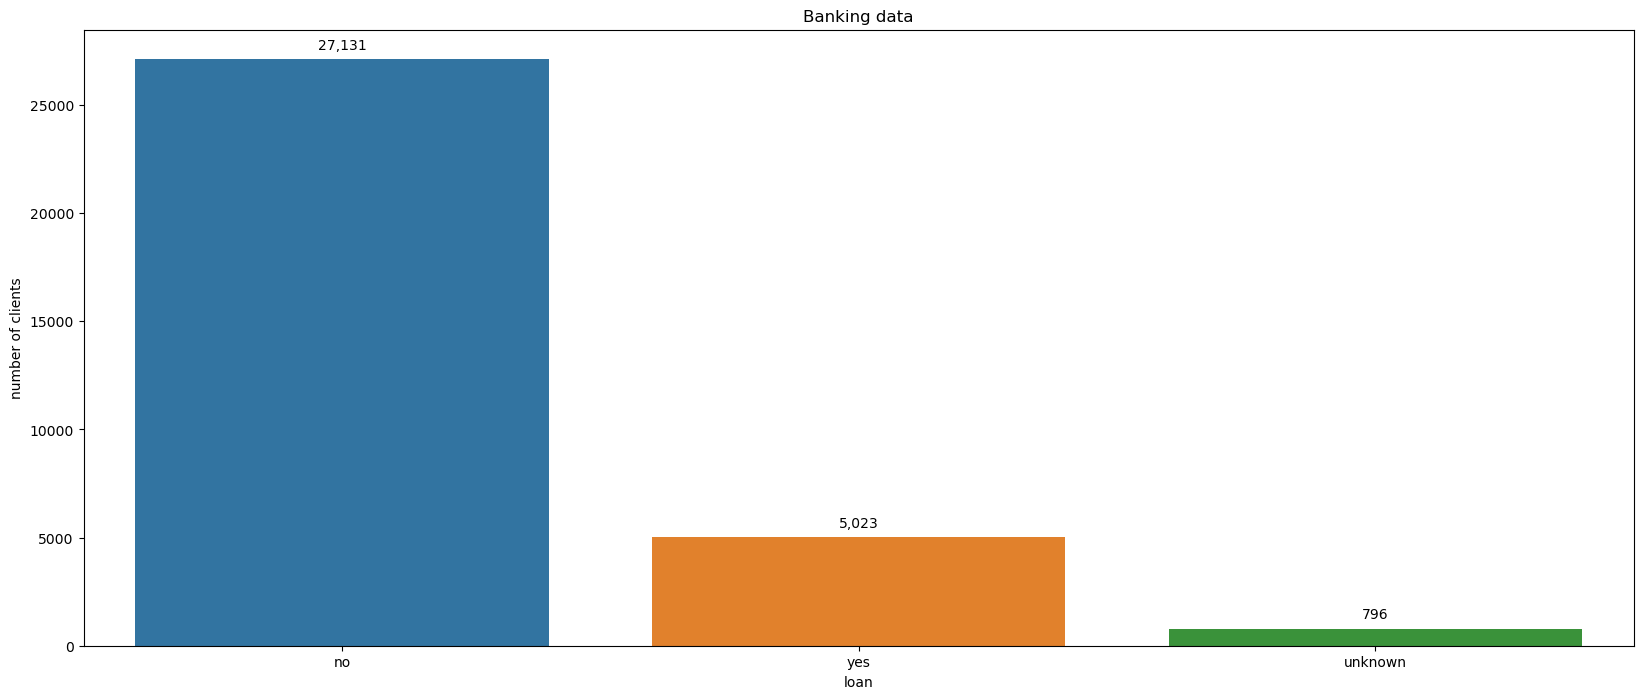

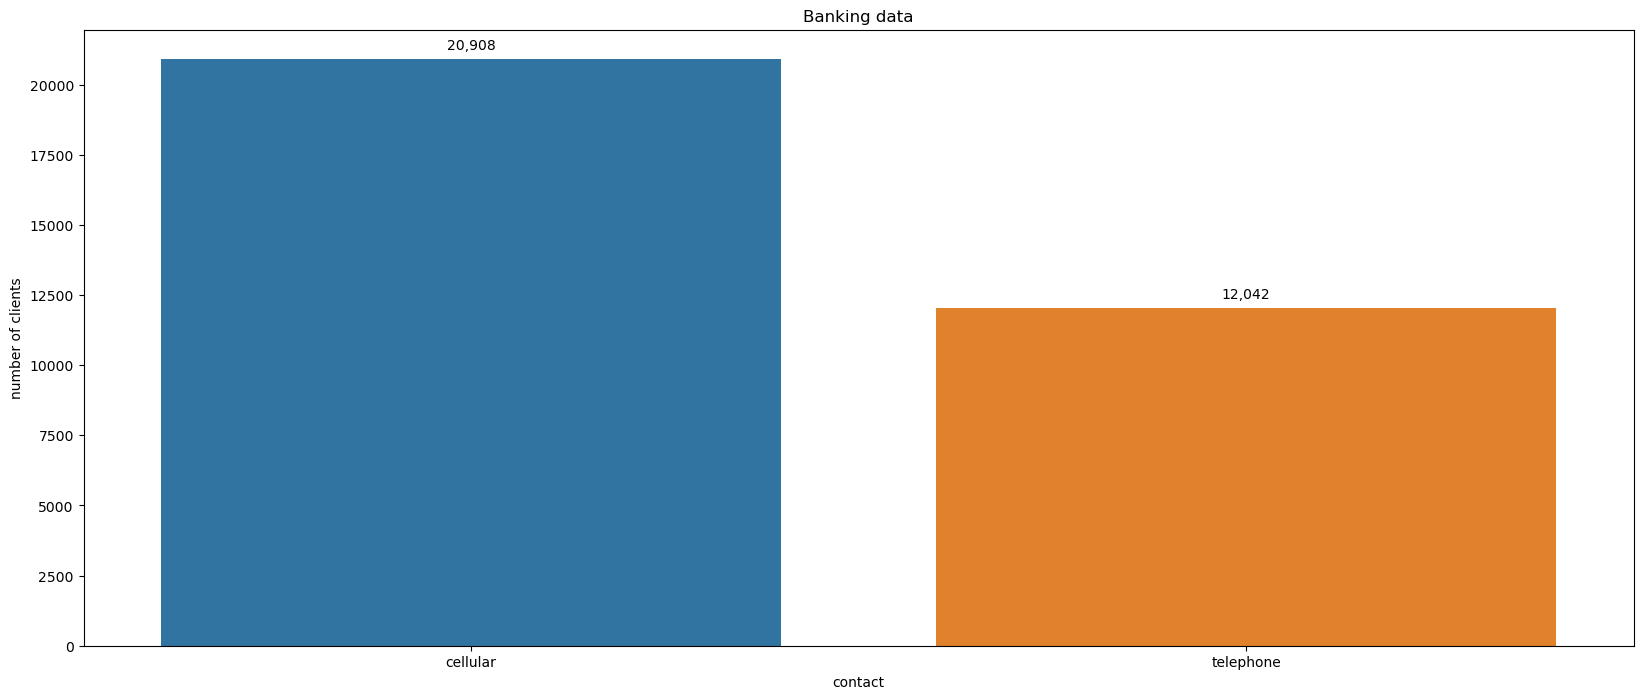

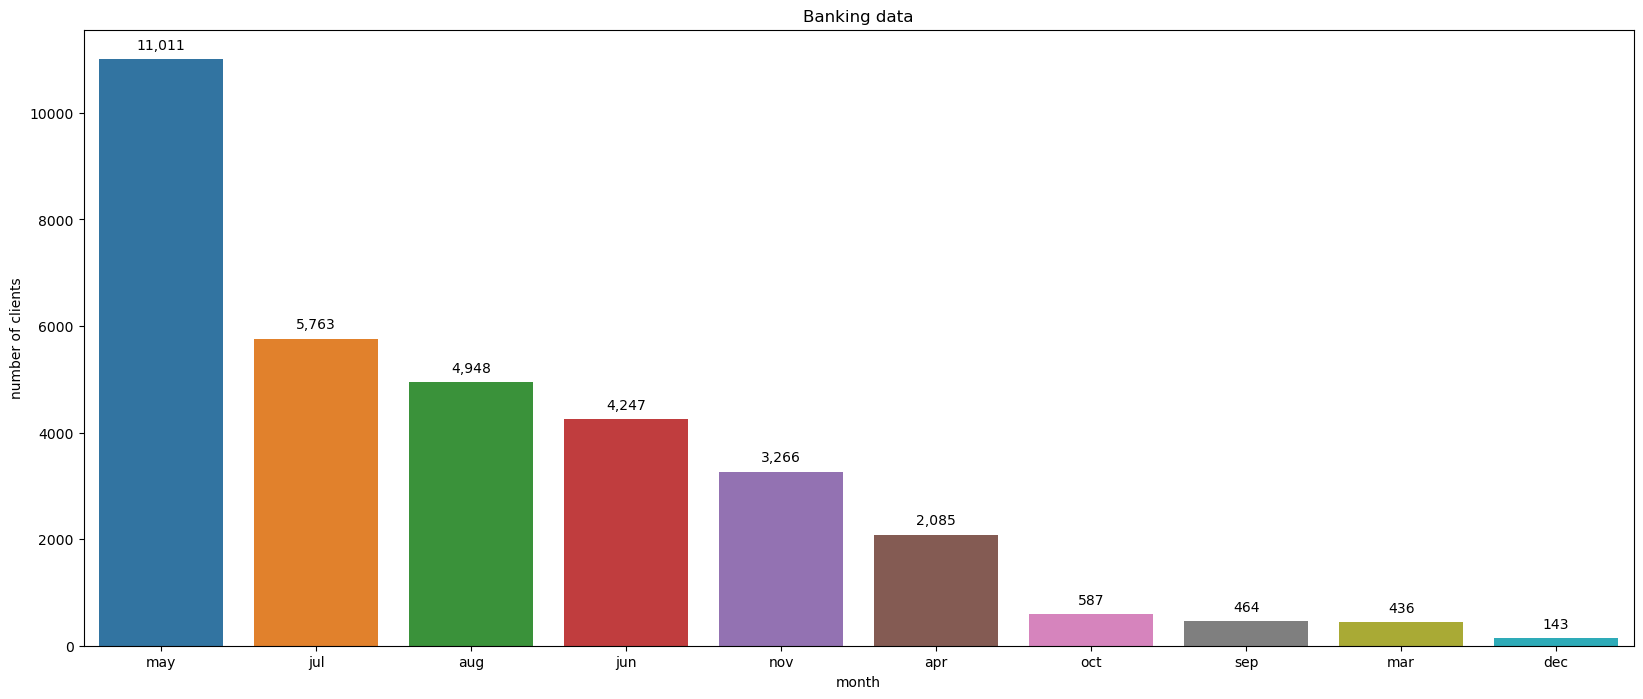

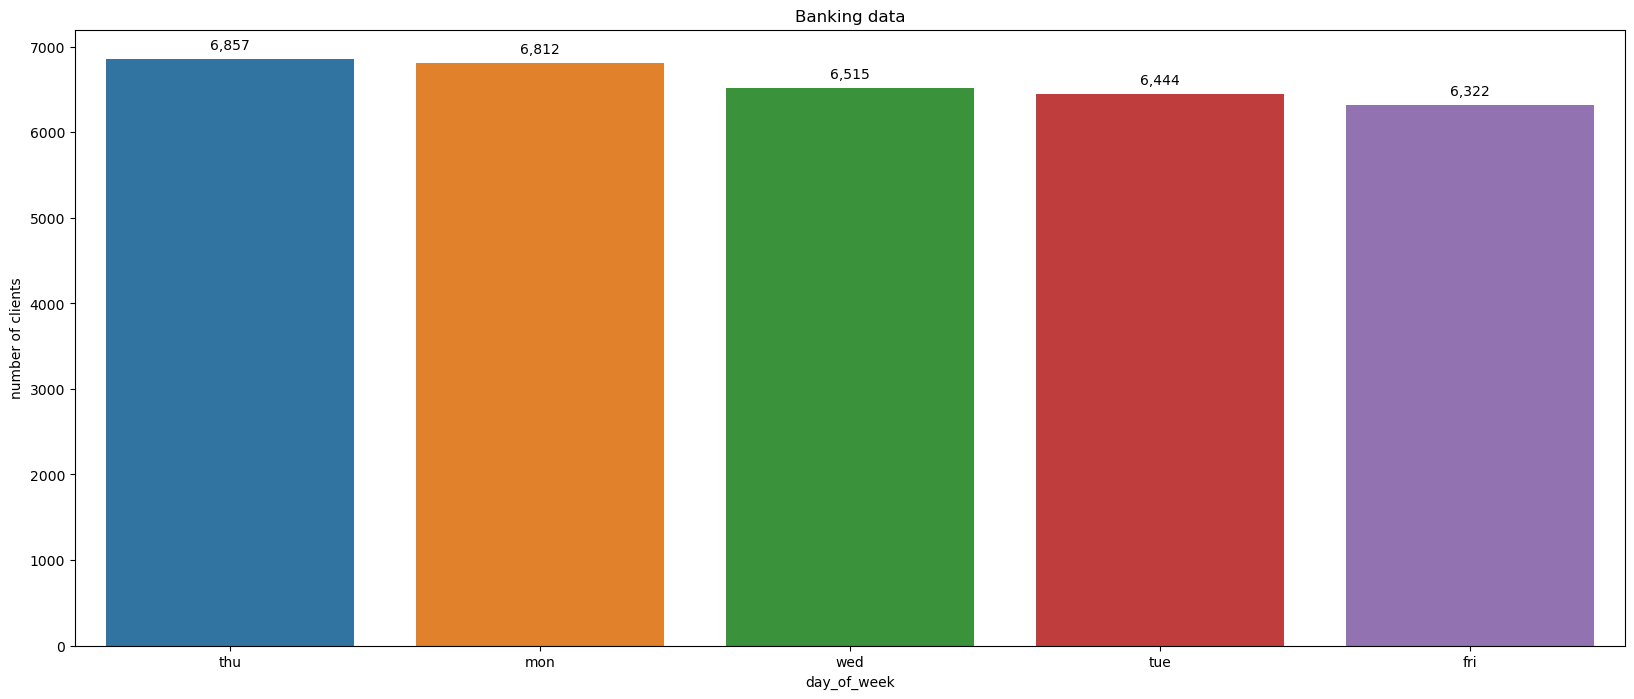

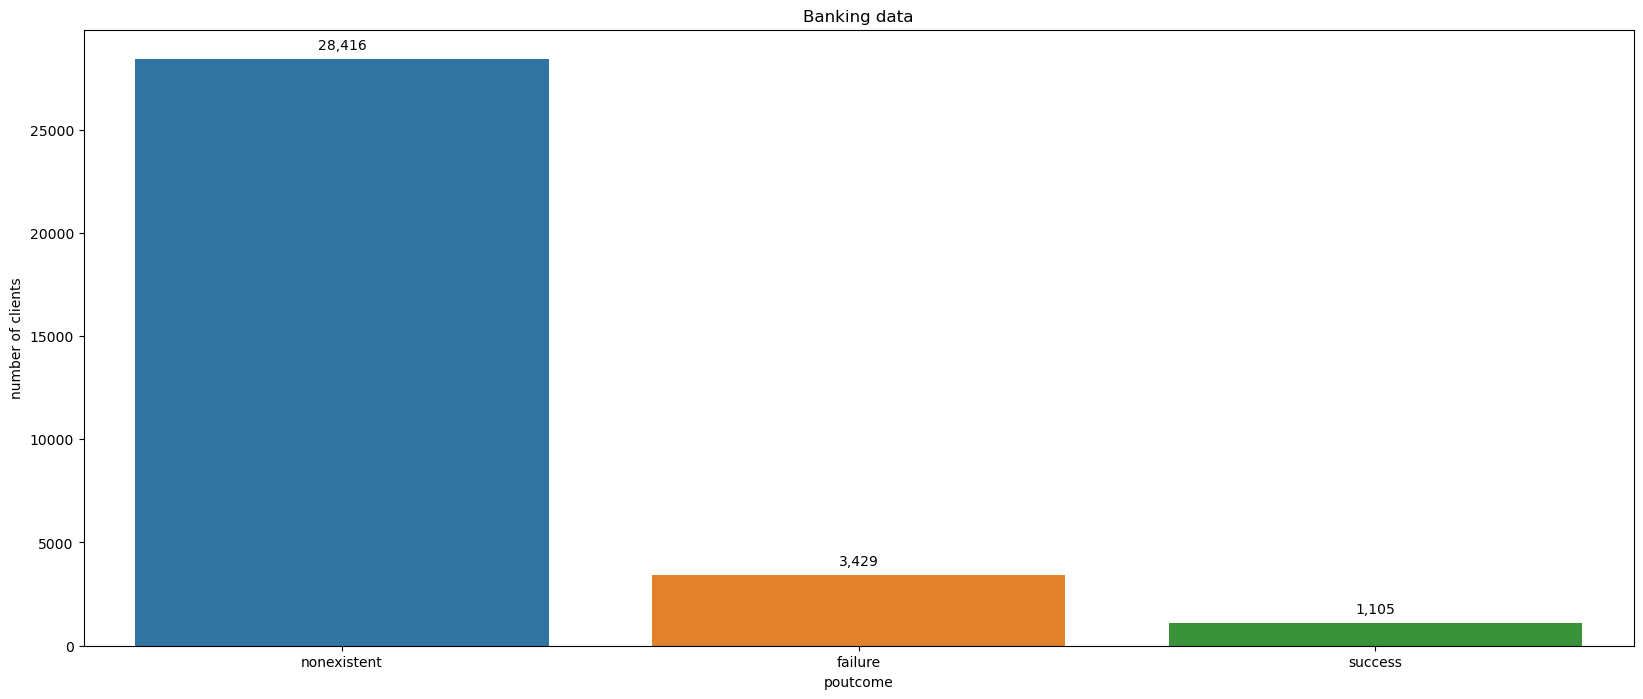

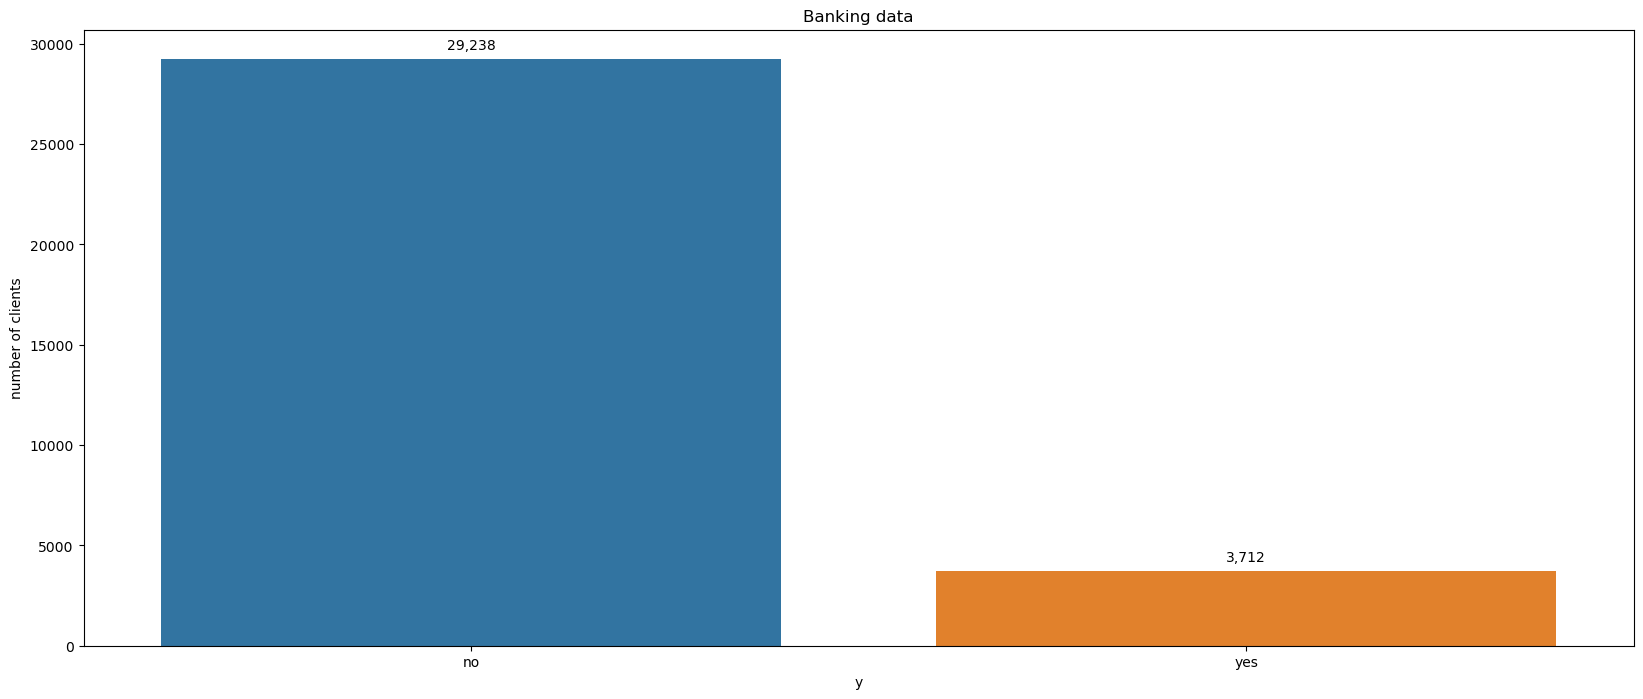

In [286]:
for column in object_columns:
    counts = df[column].value_counts()
    # Sort the categories by count in descending order
    sorted_categories = counts.index.tolist()

# Plot graph
    plt.figure(figsize=(20,8))
    ax = sns.countplot(x=df[column], order= sorted_categories)
    # plot annotate
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    # set labels and title
    plt.xlabel(column)
    plt.ylabel("number of clients")
    plt.title('Banking data')


**Conclusion from the above figures:** <br>
- There are 12 different types of jobs in this banking dataset. The highest five numbers of customers work as administrators, blue-collar, technicians, services, and management.
- Most clients are married.
- Most clients study at University and High school.
- Most clients have no credit in default.
- Most clients have more housing loans than personal loans.
- Most clients have been contacted more by cellular than telephone.
- Most clients were last contacted in May.
- Most clients were last contacted on average every day, close to each other.
- Most clients were not contacted in previous campaigns. (The number of nonexistents is the highest.)
- Most clients do not subscribe to a term deposit. 
- The dataset is imbalanced due to the results. ('no'>>'yes')



**To visualize all the data that is an object type, distinguish by result.**

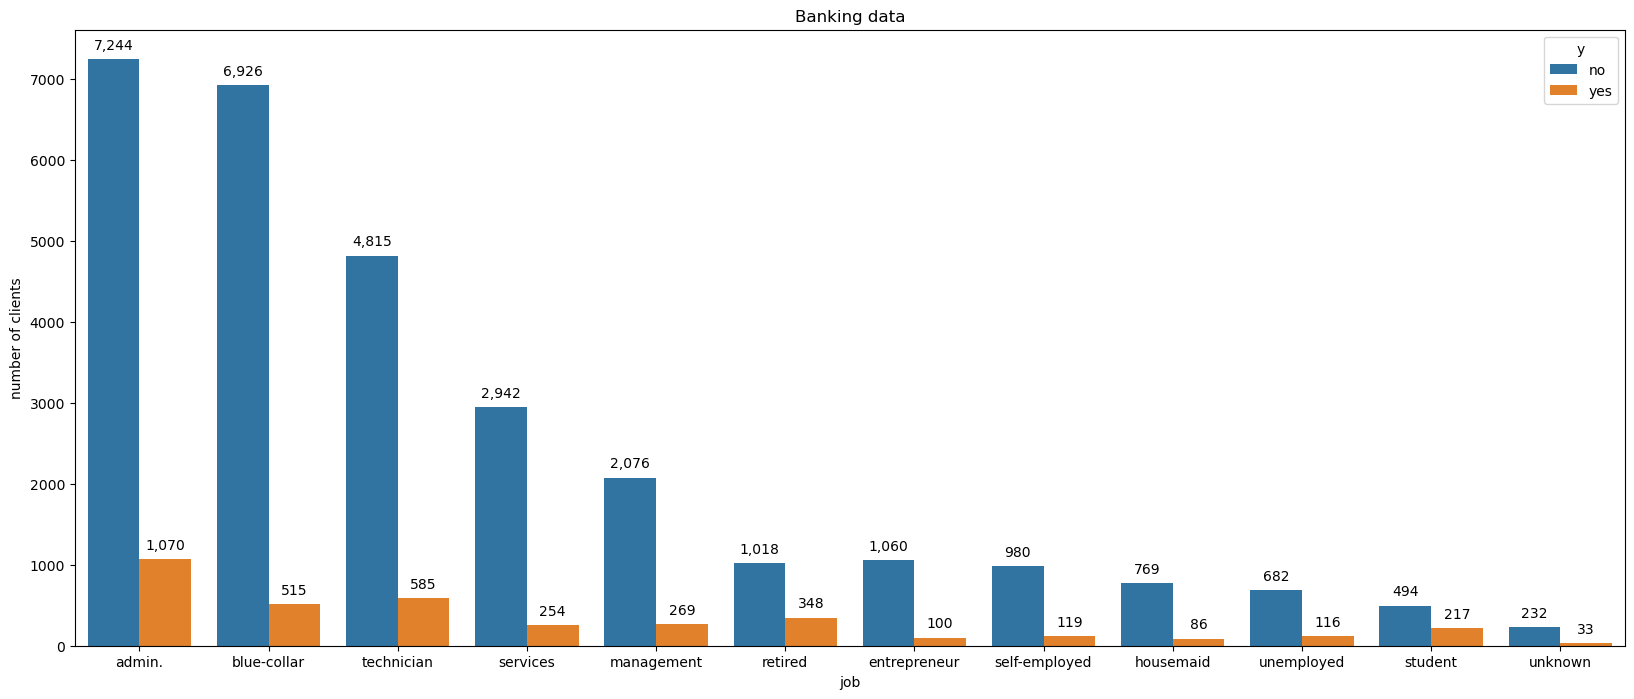

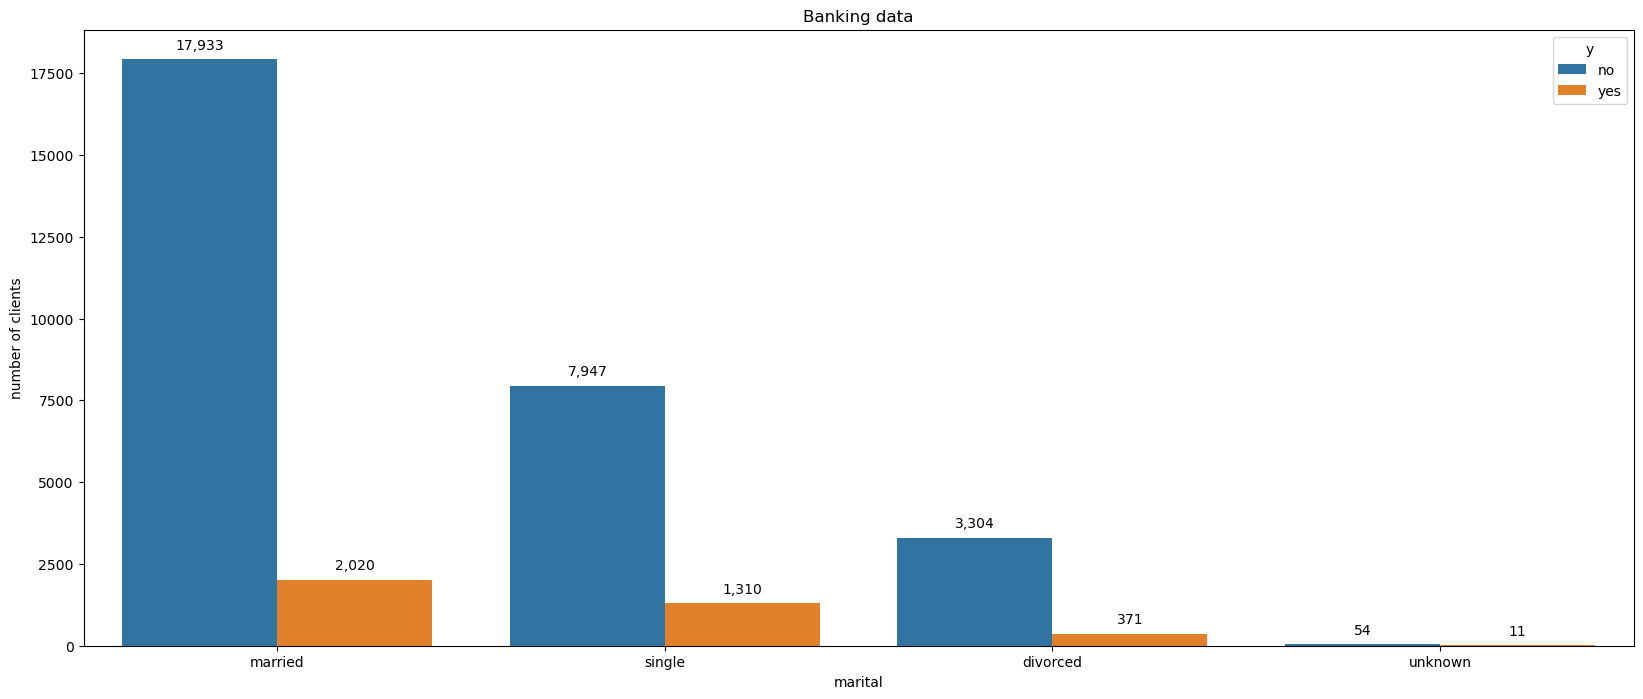

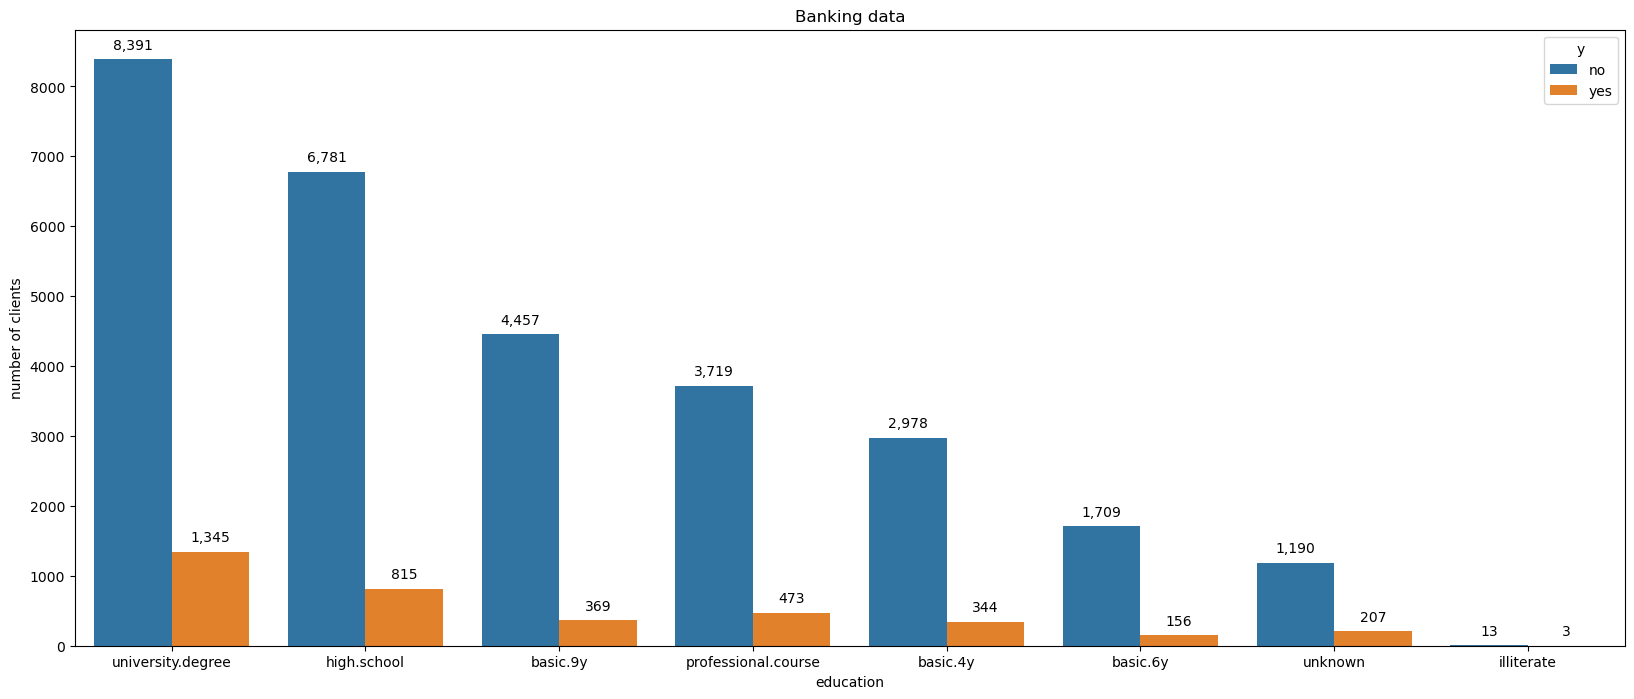

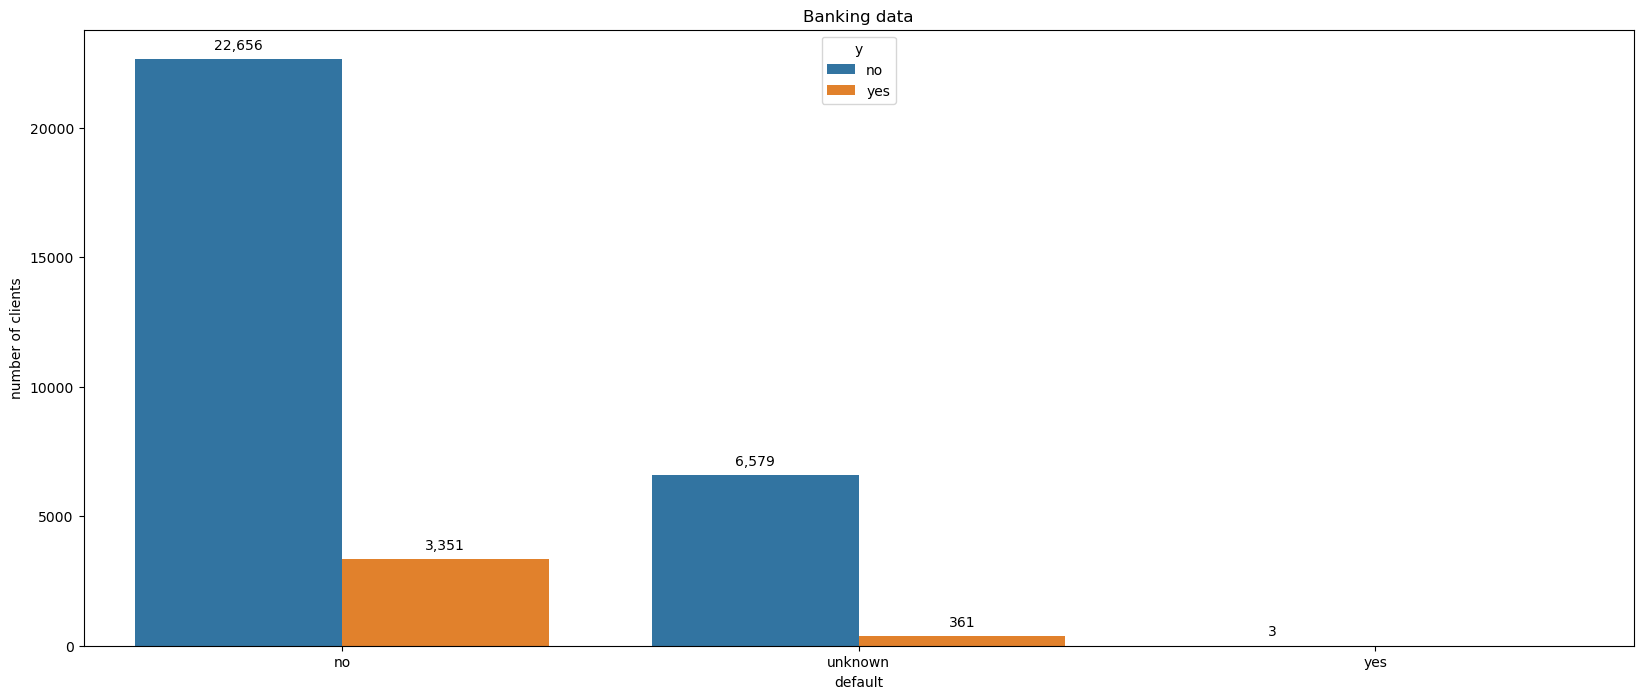

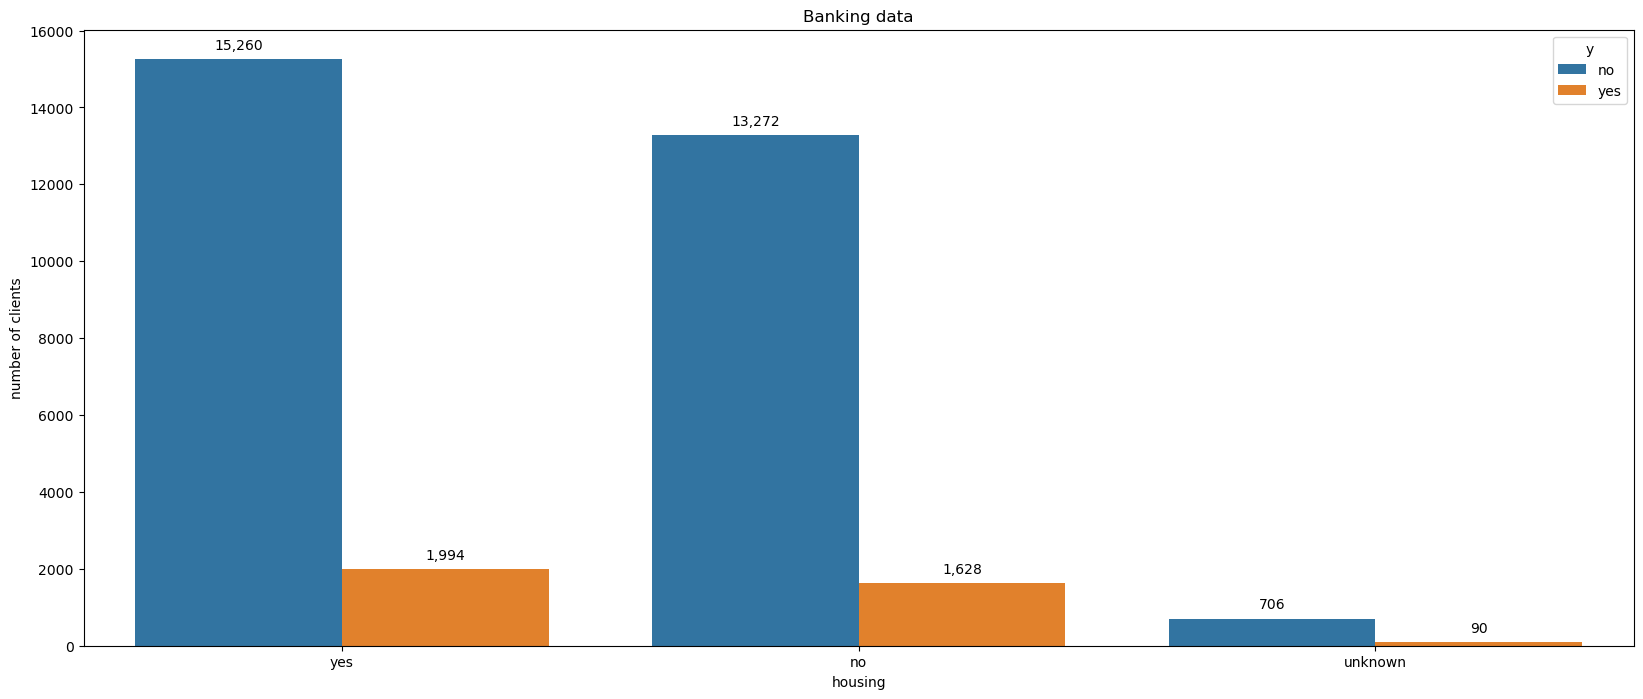

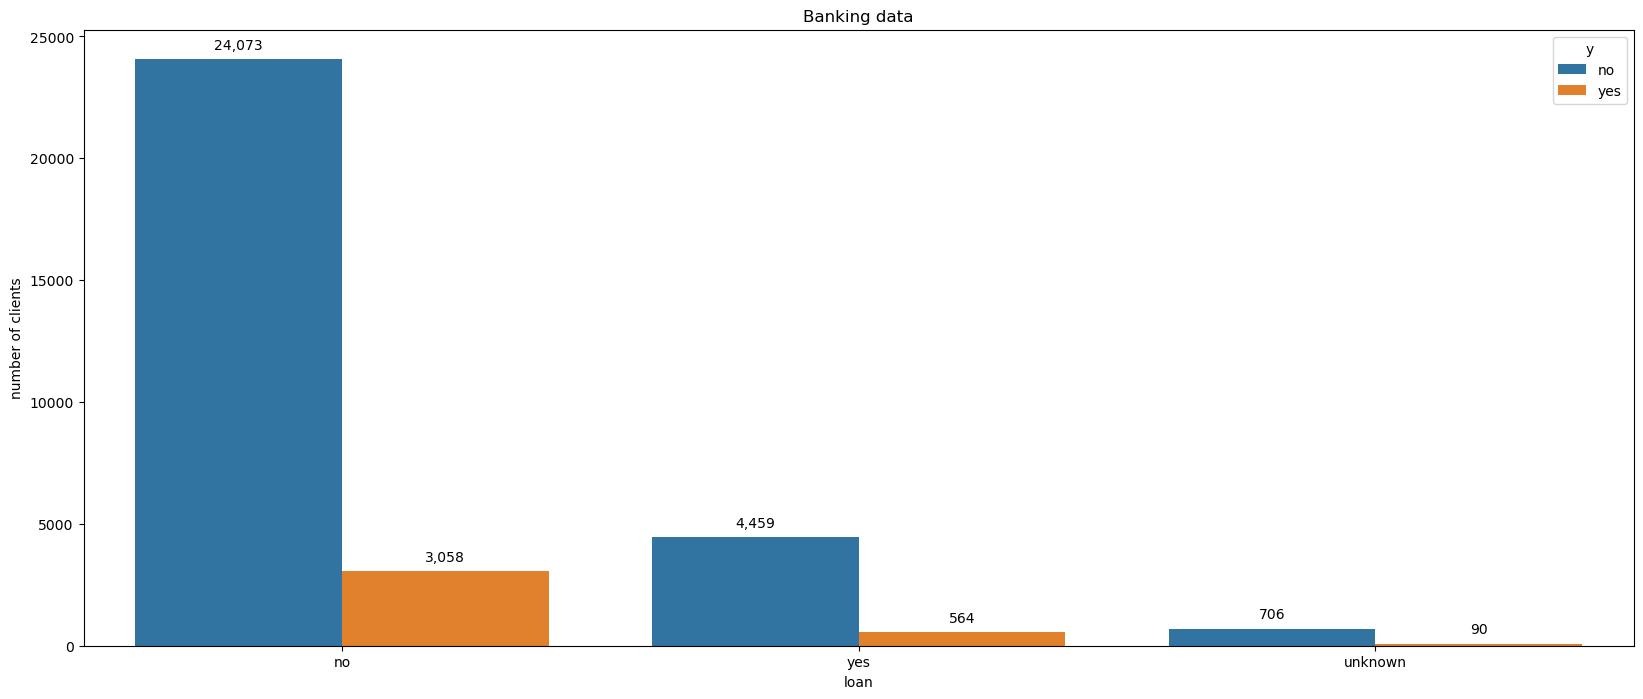

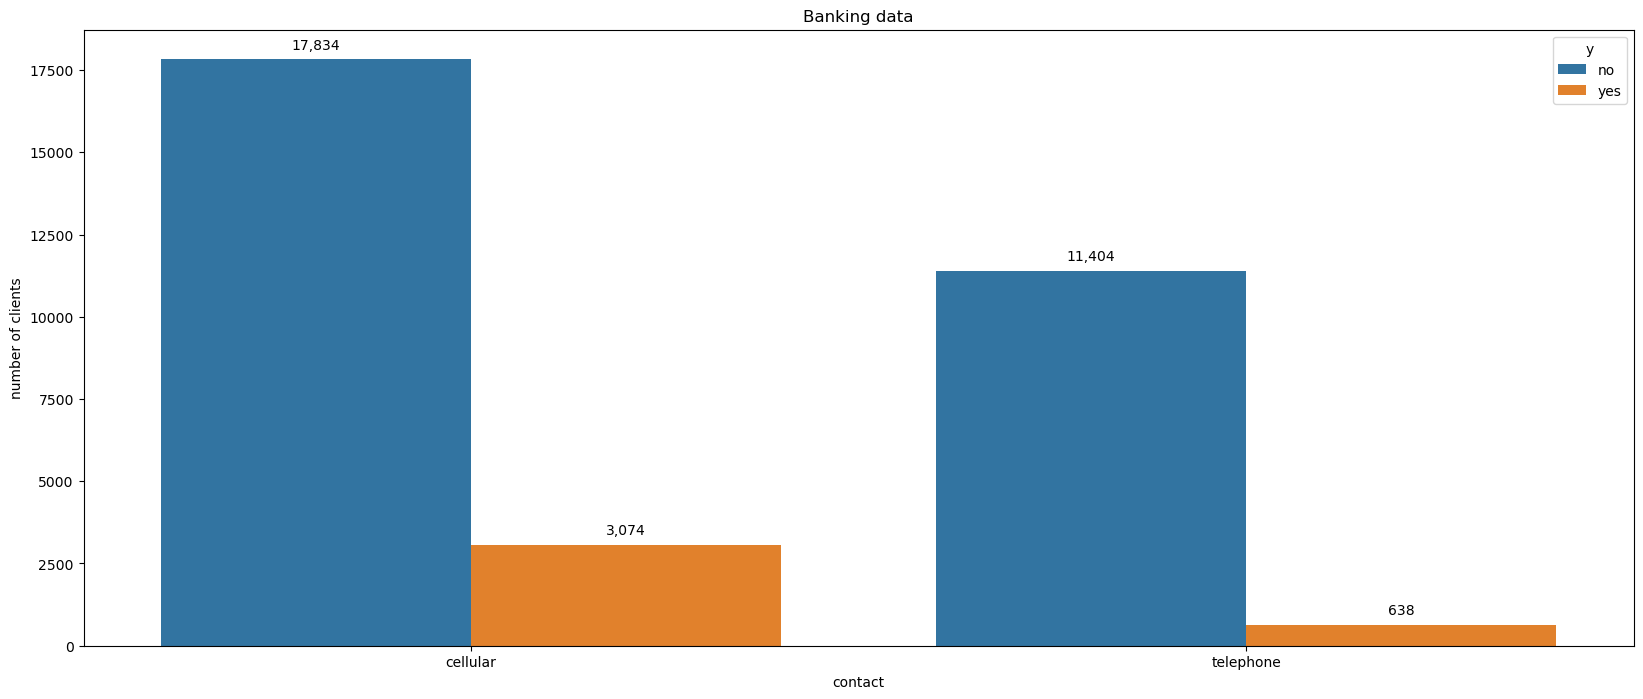

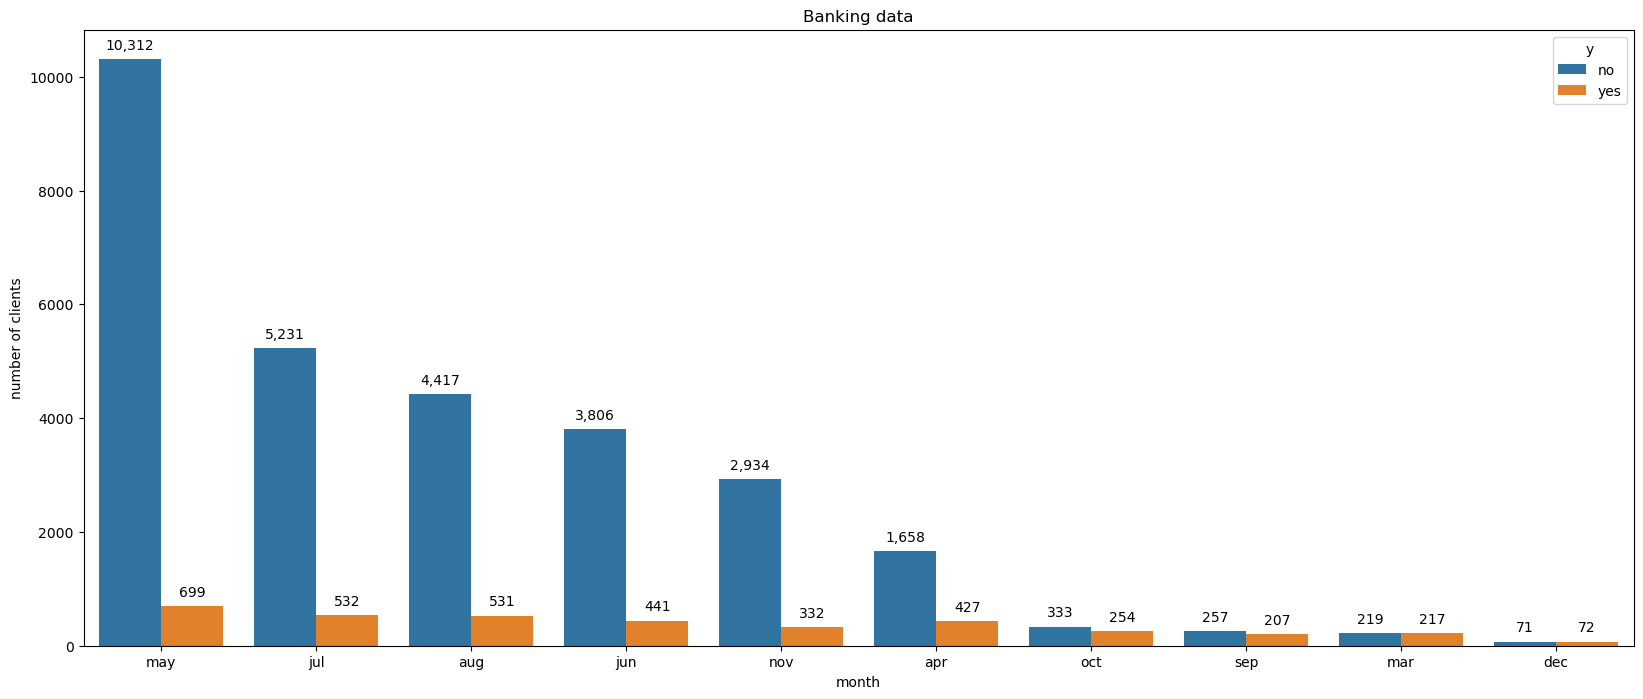

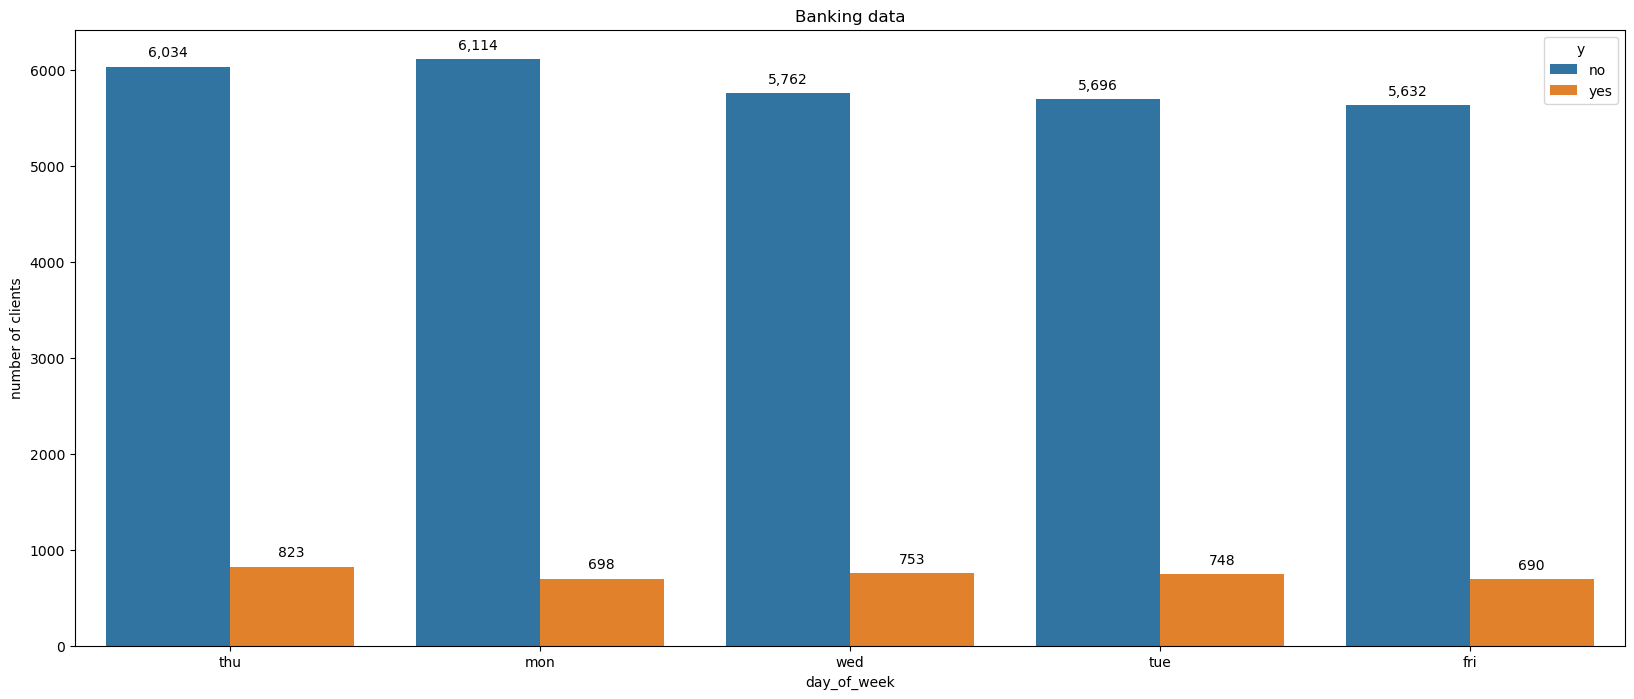

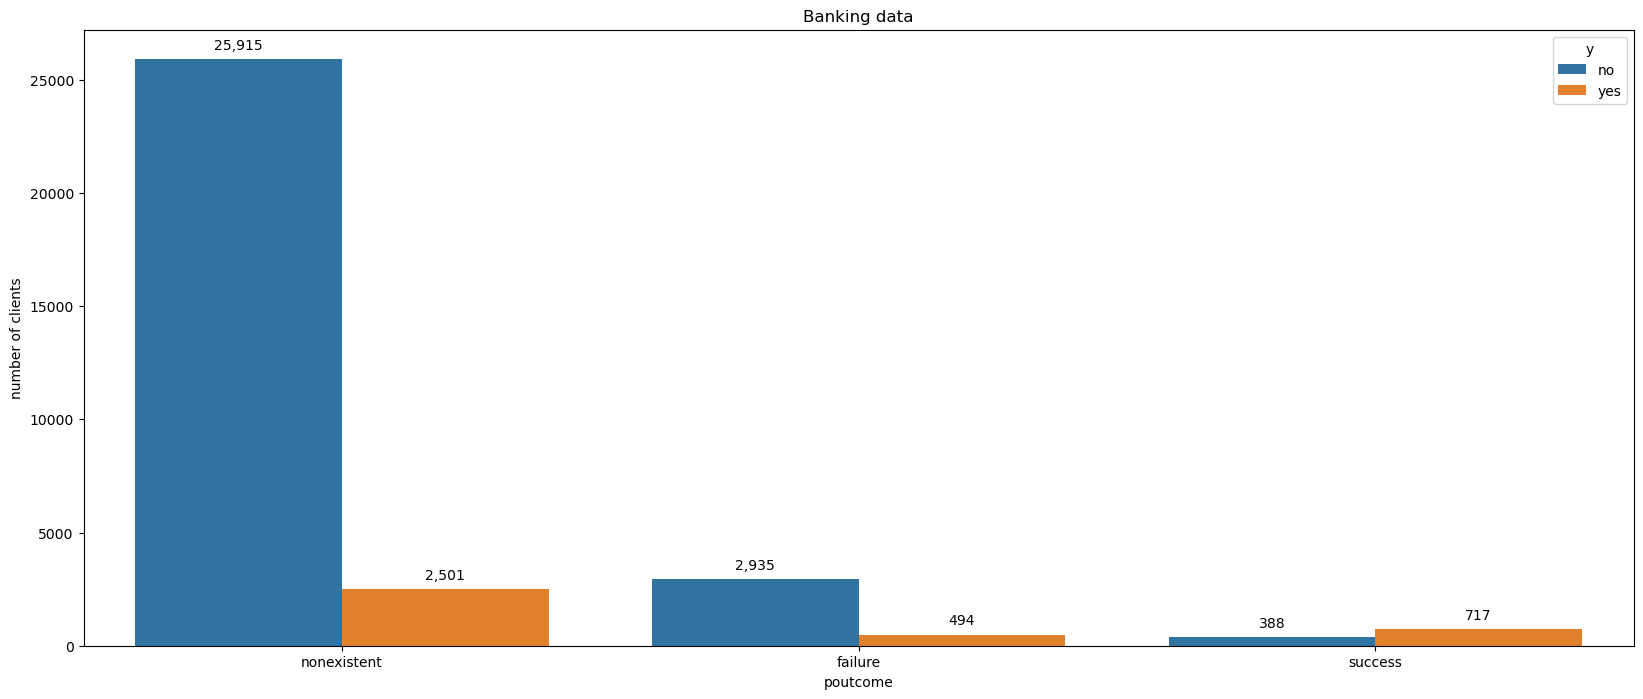

In [287]:
for column in object_columns:
    if column == 'y':
        break
    counts = df[column].value_counts()
    # Sort the categories by count in descending order
    sorted_categories = counts.index.tolist()
    
#Plot graph
    plt.figure(figsize=(20,8))
    ax = sns.countplot(x=column, hue='y', data=df, order=sorted_categories)
    # plot annotate
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    # set labels and title
    plt.xlabel(column)
    plt.ylabel("number of clients")
    plt.title('Banking data')

**Conclusion from the above figures:** <br>
- The highest number of people who subscribe to a term deposit work as administrators.
- Clients who are married deposit the most regularly.
- Most clients who subscribe to a term deposit study at a university or High school.
- Clients whose credit is not in default are more likely to subscribe to a term deposit.
- Housing loan factors tend to produce similar results.
- As with personal loans, if we see them in proportion, it can be seen that clients who have them and those who do not have them seem to     have similar habits in subscription.
- Contacting clients has a much more efficient result when done through cellular.
- There is not much implied in the month and day_of_week columns.
- Obviously, success in a previous campaign means success in a new campaign.

**Looking into more details, how many people subscribe to a term deposit by categorizing their occupation.**

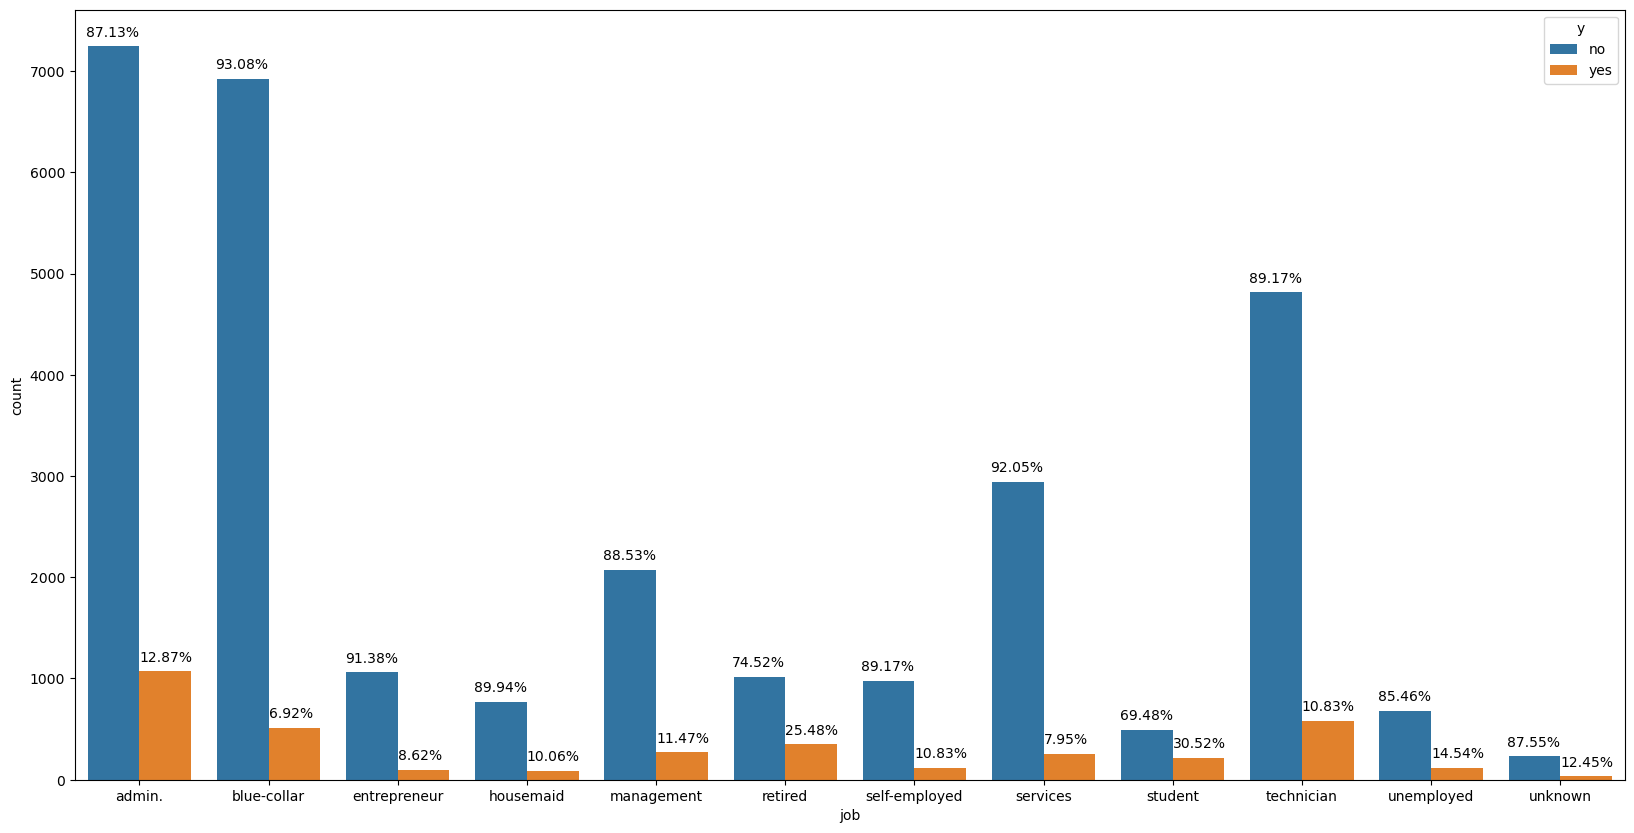

In [288]:
# Create count column
grouped_counts = df.groupby('job')['y'].value_counts().rename('count').reset_index()
# Add percentage column
grouped_counts['percentage'] = grouped_counts.groupby('job')['count'].apply(lambda x: (x / x.sum()) * 100)
# Plot bar chart
ax = sns.barplot(data=grouped_counts, x='job', y='count', hue='y')
# Fit the figure
fig = plt.gcf()
fig.set_size_inches(20, 10)

# Add annotate of percentage on every bar chart
i = -1
even = 0

for index, row in grouped_counts.iterrows():
    if even % 2 == 0:
        even = 0
        i += 1
    if(even == 0):
        plt.annotate(f"{row['percentage']:.2f}%", xy=(i, row['count']), xytext=(0, 5),
                    textcoords="offset points", va='bottom', ha='right')
    else:
        plt.annotate(f"{row['percentage']:.2f}%", xy=(i, row['count']), xytext=(0, 5),
                    textcoords="offset points", va='bottom', ha='left')
    even += 1
plt.show()

From the graph above, it can be seen that students and retired workers are likely to subscribe to more term deposits compared to the others. Their percentages are 30.52 and 25.48, respectively. By contacting them more, likely resulting in more subscribers on a term deposit.

# Feature Engineering and DO some more EDA

In [289]:
# Define a mapping dictionary
mapping = {'yes': 1, 'no': 0}

# To change values 
df['y'] = df['y'].map(mapping)

In [290]:
# One Hot-Encoding
df = pd.get_dummies(df)
df

,age,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,999,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36,120,2,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
32947,54,131,4,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32948,29,165,1,999,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [291]:
# Assign data for training and testing
X = df.drop('y', axis=1)
y= df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [292]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

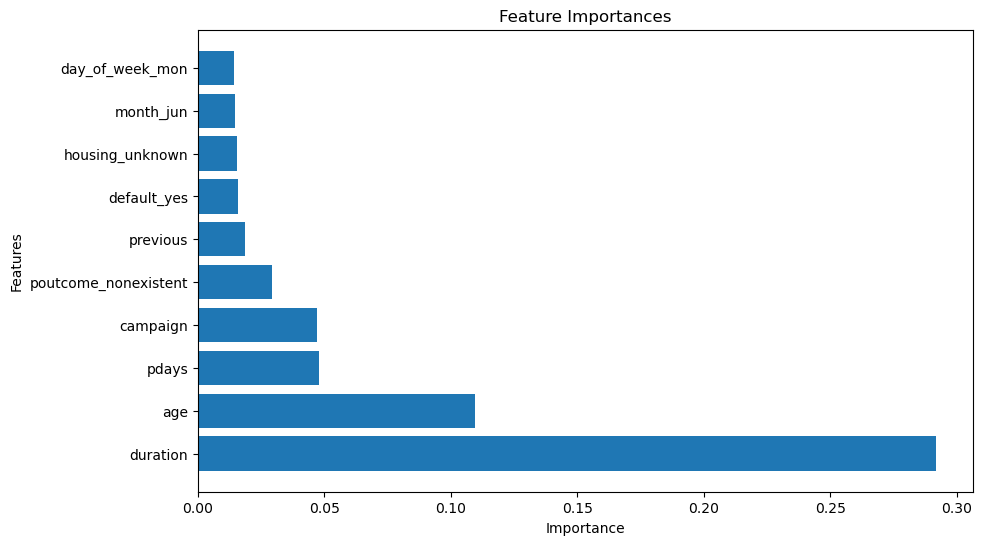

In [293]:
# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Choose top 10 important features
top_indices = indices[:10]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), df.columns[top_indices])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


##### Now, looking into the four most important features: duration, age, pdays and campaign respectively.

In [294]:
df[['duration', 'age', 'pdays', 'campaign']].describe()

,duration,age,pdays,campaign
count,32950.000000,32950.000000,32950.000000,32950.000000
mean,258.127466,40.014112,962.052413,2.560607
std,258.975917,10.403636,187.951096,2.752326
min,0.000000,17.000000,0.000000,1.000000
25%,103.000000,32.000000,999.000000,1.000000
50%,180.000000,38.000000,999.000000,2.000000
75%,319.000000,47.000000,999.000000,3.000000
max,4918.000000,98.000000,999.000000,56.000000


Import data to look into more details

In [295]:
df = pd.read_csv('BankingDataset.csv')

The frequency of the number of clients between subscribing and not subscribing by **the duration feature.**

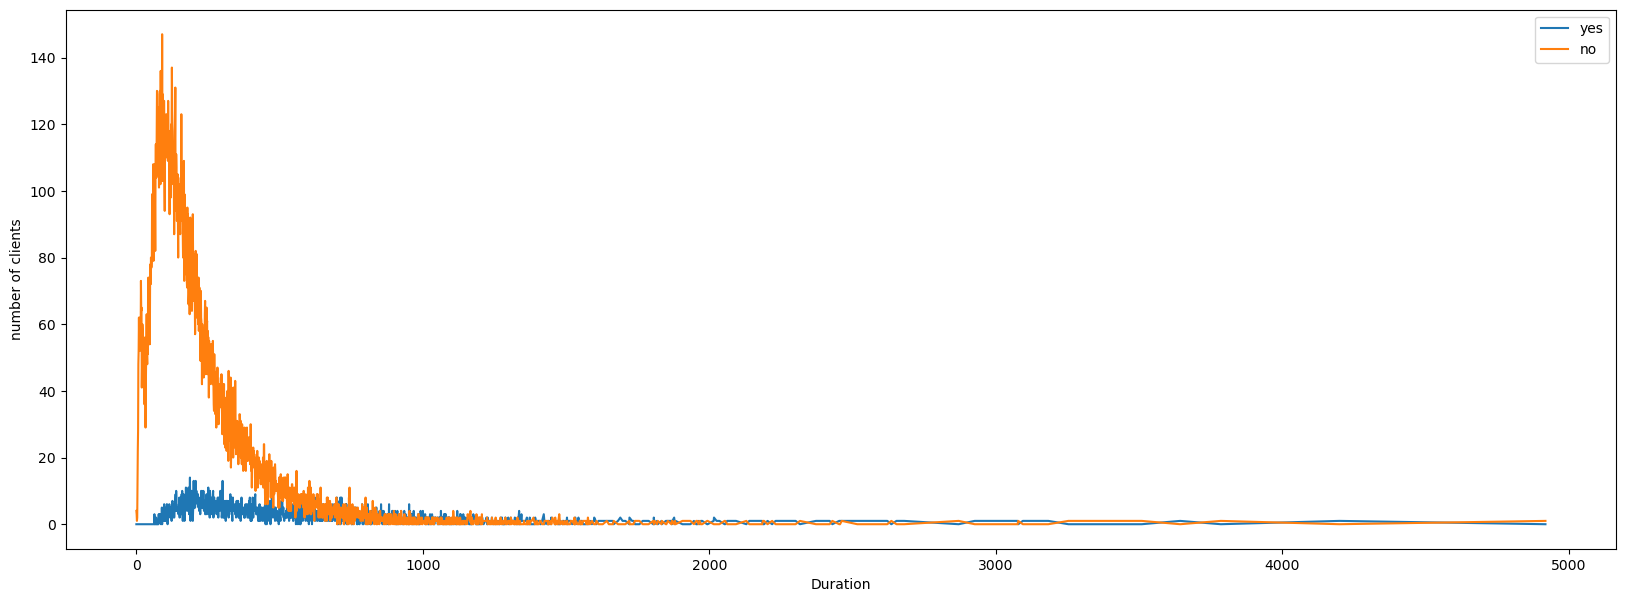

In [296]:
# Group the DataFrame by 'duration' and 'y' columns and count the frequency of each combination
grouped_data = df.groupby(['duration', 'y']).size().reset_index(name='frequency')

# Pivot the data to have 'yes' and 'no' as separate columns
pivot_data = grouped_data.pivot(index='duration', columns='y', values='frequency').fillna(0)

plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.xlabel('Duration')
plt.ylabel('number of clients')
plt.legend()

# Show the plot
plt.show()


Looking at a more specific duration to find the peak of the graph, where the range is between 0 and 300.

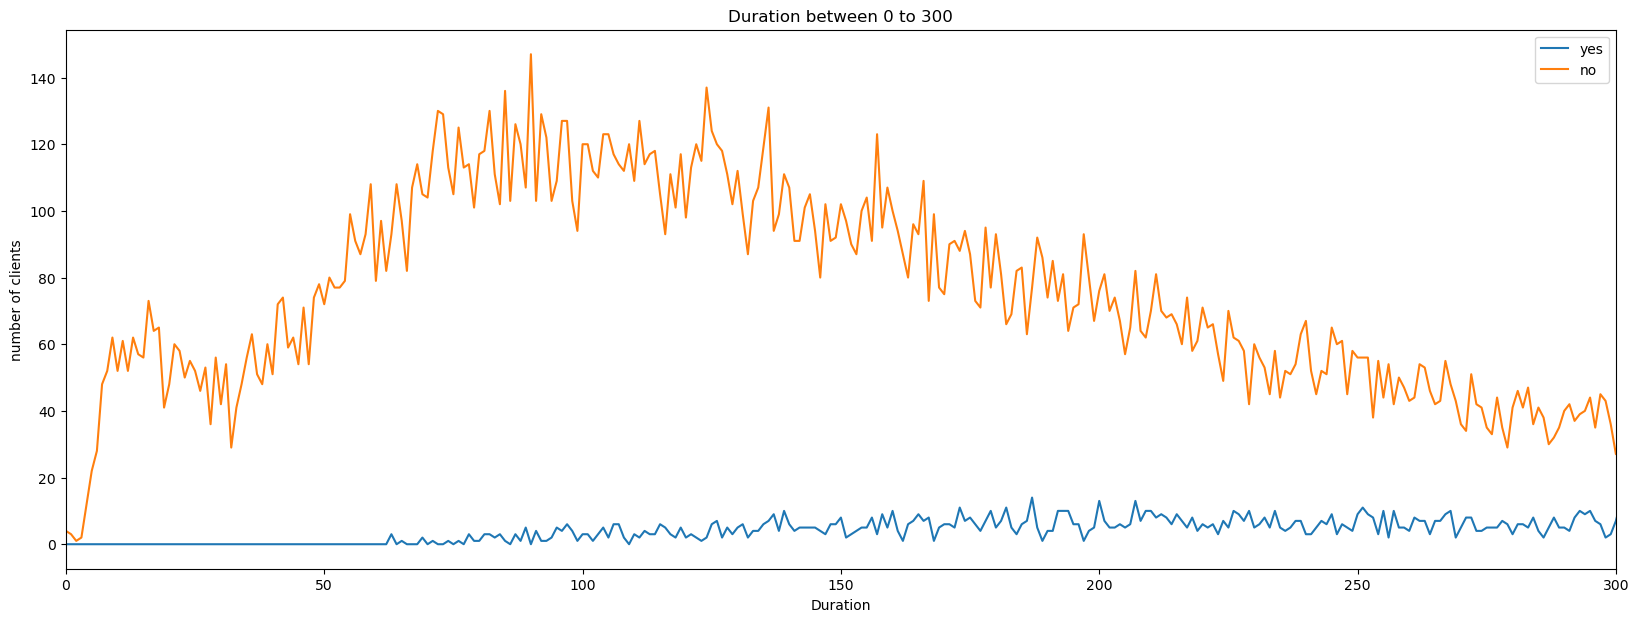

In [297]:
plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.title('Duration between 0 to 300')
plt.xlabel('Duration')
plt.ylabel('number of clients')
plt.legend()

# Set the x-axis which is between 0 to 300
plt.xlim(0, 300)

# Show the plot
plt.show()


Looking at a more specific duration to find the cutoff that is going to result in convergence, where the range is between 400 and 1000.

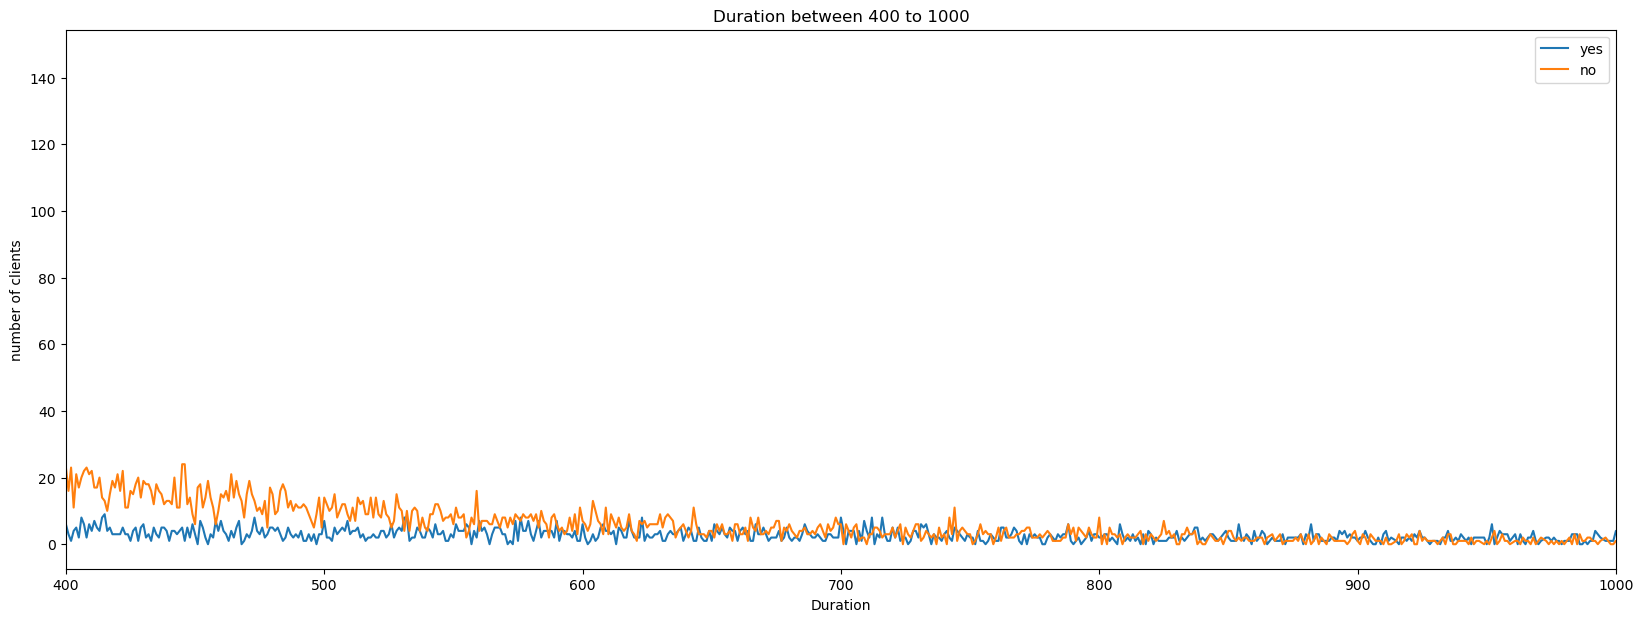

In [298]:
plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.title('Duration between 400 to 1000')
plt.xlabel('Duration')
plt.ylabel('number of clients')
plt.legend()

# Set the x-axis which is between 400 to 1000
plt.xlim(400, 1000)

# Show the plot
plt.show()


Looking into 2 types of contacts which are telephone and cellular.

In [299]:
telephone = df[df['contact'] == 'telephone']
cellular = df[df['contact'] == 'cellular']

Looking at a more specific duration of telephone, where the range is between 500 and 1000.

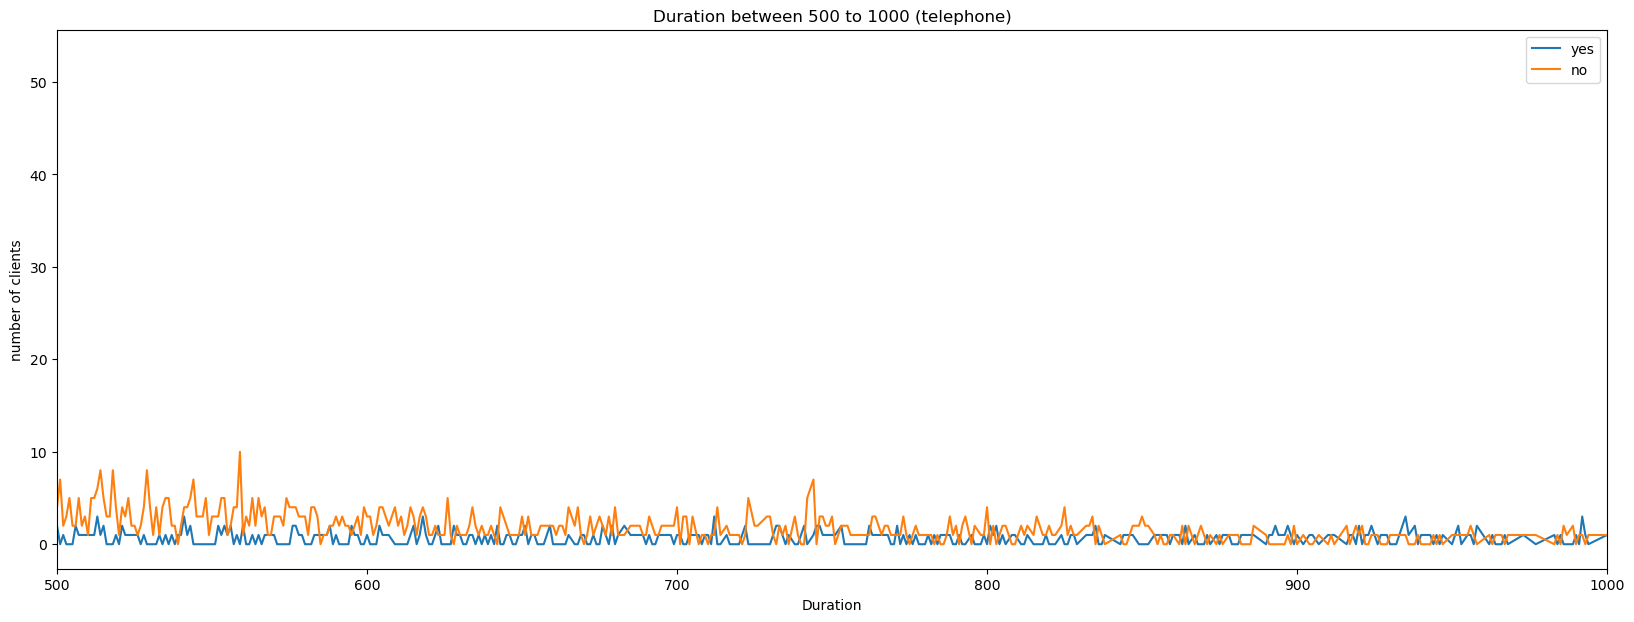

In [300]:
# Group the DataFrame by 'duration' and 'y' columns and count the frequency of each combination
grouped_data = telephone.groupby(['duration', 'y']).size().reset_index(name='frequency')

# Pivot the data to have 'yes' and 'no' as separate columns
pivot_data = grouped_data.pivot(index='duration', columns='y', values='frequency').fillna(0)

plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.title('Duration between 500 to 1000 (telephone)')
plt.xlabel('Duration')
plt.ylabel('number of clients')
plt.legend()
plt.xlim(500, 1000)
# Show the plot
plt.show()


Looking at a more specific duration of cellular, where the range is between 500 and 1000.

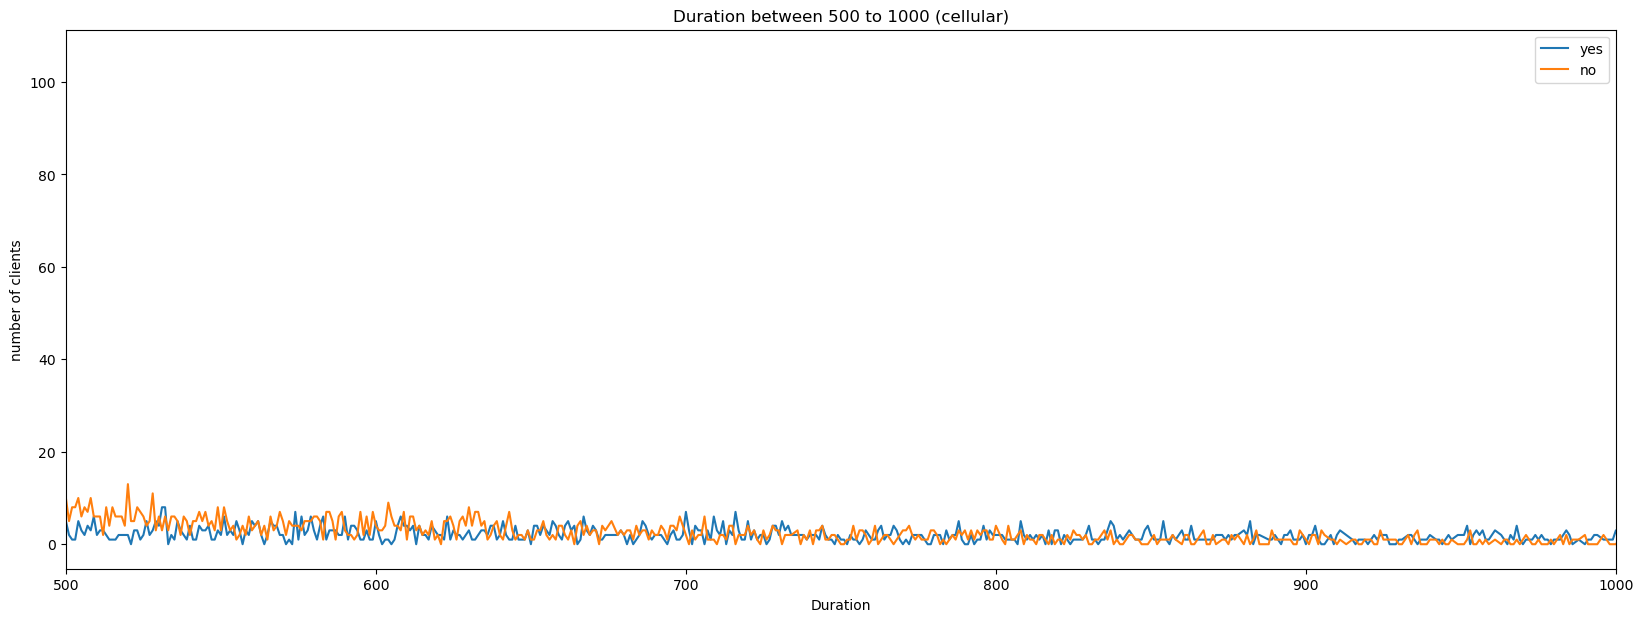

In [301]:
# Group the DataFrame by 'duration' and 'y' columns and count the frequency of each combination
grouped_data = cellular.groupby(['duration', 'y']).size().reset_index(name='frequency')

# Pivot the data to have 'yes' and 'no' as separate columns
pivot_data = grouped_data.pivot(index='duration', columns='y', values='frequency').fillna(0)

plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.title('Duration between 500 to 1000 (cellular)')
plt.xlabel('Duration')
plt.ylabel('number of clients')
plt.legend()
plt.xlim(500, 1000)
# Show the plot
plt.show()


**Conclusion from the duration feature**
- The worst performance is approximately 90 seconds in duration.
- In the range between 0 and 300 seconds in duration, it shows that there is clearly more no-subscription than subscription. So, a shorter duration of calling leads to more no-subsriptions.
- In the latest graph, it shows that the duration since 650 and so on shows better performance. Therefore, a long duration of calling leads to fewer no-subscriptions. <br>
- A call lasting more than 650 seconds is likely to make clients subscribe to a term deposit.
- From the two types of contact, which are telephone and cellular, it can be seen that the result is likely similar, which is that a duration of more than 650 seconds is good.

The frequency of the number of clients between subscribing and not subscribing by **the age feature.**

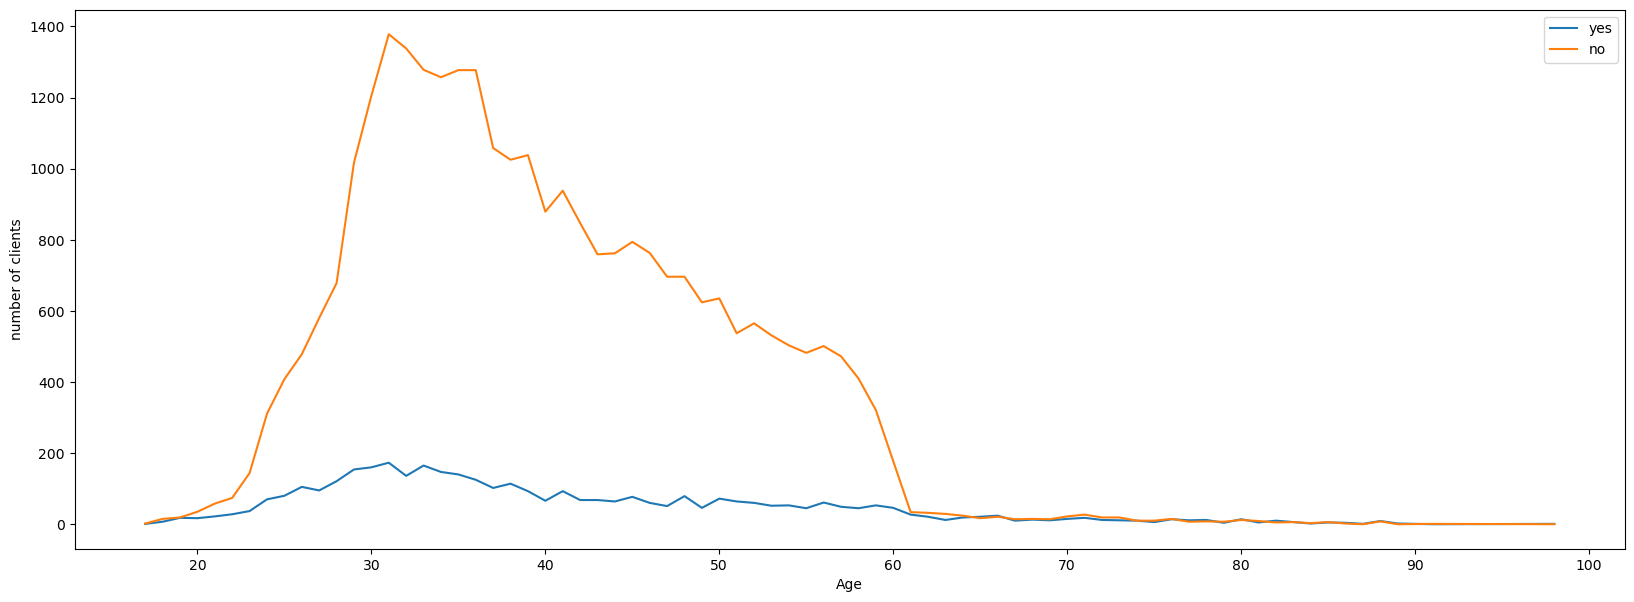

In [302]:
# Group the DataFrame by 'duration' and 'y' columns and count the frequency of each combination
grouped_data = df.groupby(['age', 'y']).size().reset_index(name='frequency')

# Pivot the data to have 'yes' and 'no' as separate columns
pivot_data = grouped_data.pivot(index='age', columns='y', values='frequency').fillna(0)

plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('number of clients')
plt.legend()

# Show the plot
plt.show()


Looking at a more specific age, where the range is between 0 and 25.

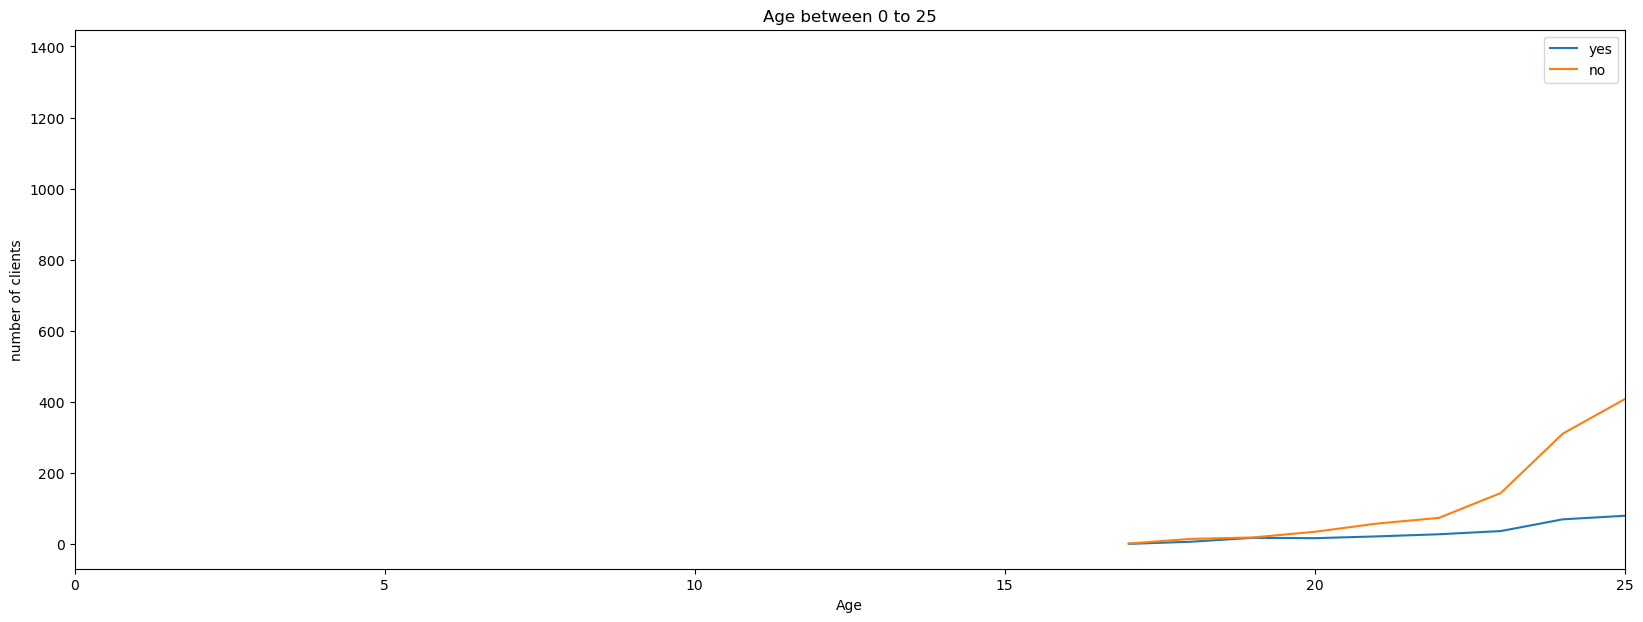

In [303]:
plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.title('Age between 0 to 25')
plt.xlabel('Age')
plt.ylabel('number of clients')
plt.legend()

# Set the x-axis which is between 0 to 25
plt.xlim(0, 25)
# Show the plot
plt.show()


Looking at a more specific age, where the range is between 60 and 65.

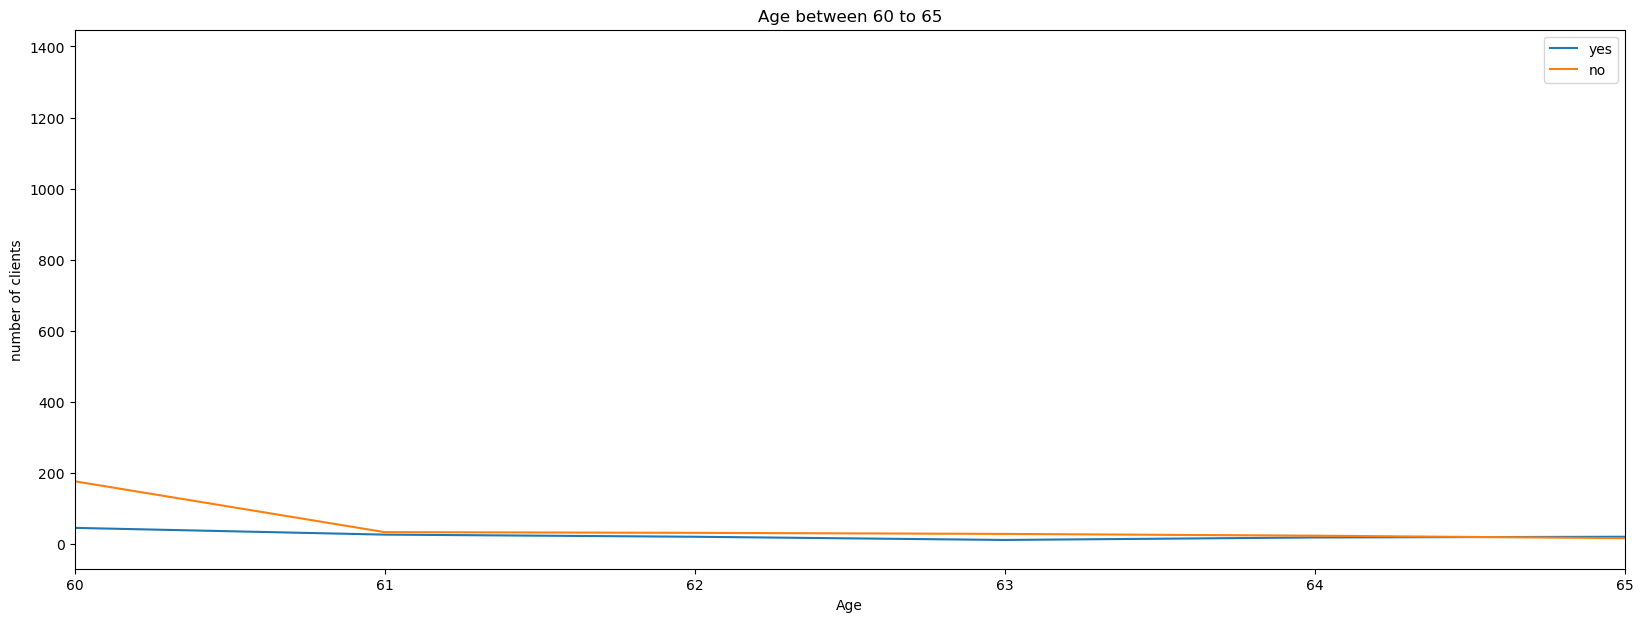

In [304]:
plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.title('Age between 60 to 65')
plt.xlabel('Age')
plt.ylabel('number of clients')
plt.legend()

# Set the x-axis which is between 60 to 65
plt.xlim(60, 65)
# Show the plot
plt.show()

Looking at the jobs made by the clients ages

In [305]:
df[df['age'] < 20].groupby('job')['y'].value_counts() 

job      y  
student  no     36
         yes    26
Name: y, dtype: int64

In [306]:
df[df['age'] >= 61].groupby('job')['y'].value_counts() 

job            y  
admin.         yes     21
               no      18
blue-collar    no      13
               yes      5
entrepreneur   yes      4
               no       2
housemaid      no      22
               yes     21
management     yes     14
               no       9
retired        no     288
               yes    246
self-employed  no       7
services       no       1
technician     no      19
               yes     11
unemployed     no       5
               yes      1
unknown        no      12
               yes      7
Name: y, dtype: int64

**Conclusion from the age feature**
- The worst performance is around the age of 20 to 60.
- In less than 20 and more than 60, there is much better performance in subscribing to a term deposit.
- From looking into the clients' jobs by age, it can be seen that if they are younger than 20, most of them are students, while more than 60 are retired workers. Additionally, it relates with the conclusion of the last EDA part at the beginning of this project that students and retired workers are more likely to subscribe to a term deposit.

The frequency of the number of clients between subscribing and not subscribing by **the pdays feature.**

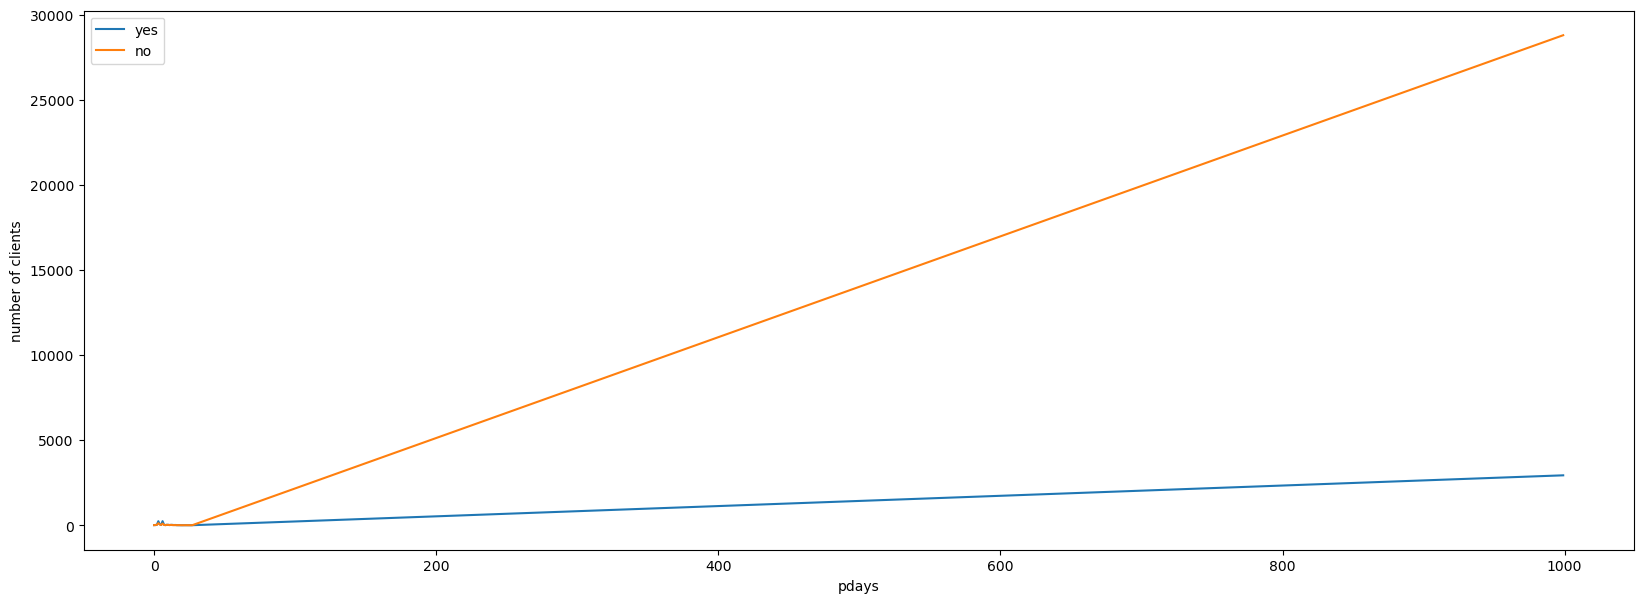

In [307]:
# Group the DataFrame by 'duration' and 'y' columns and count the frequency of each combination
grouped_data = df.groupby(['pdays', 'y']).size().reset_index(name='frequency')

# Pivot the data to have 'yes' and 'no' as separate columns
pivot_data = grouped_data.pivot(index='pdays', columns='y', values='frequency').fillna(0)

plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.xlabel('pdays')
plt.ylabel('number of clients')
plt.legend()

# Show the plot
plt.show()


In [308]:
df['pdays'].value_counts()

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

**Conclusion from the pdays feature**
- The graphs and data show that almost all pdays are 999, which means there was no contact in the previous campaign. It can be seen from the fact that most clients do not subscribe to a term deposit.
- The value important of the feature is in high ranking because in this dataset there are extremely more no results than yes results.

The frequency of the number of clients between subscribing and not subscribing by **the campaign feature.**

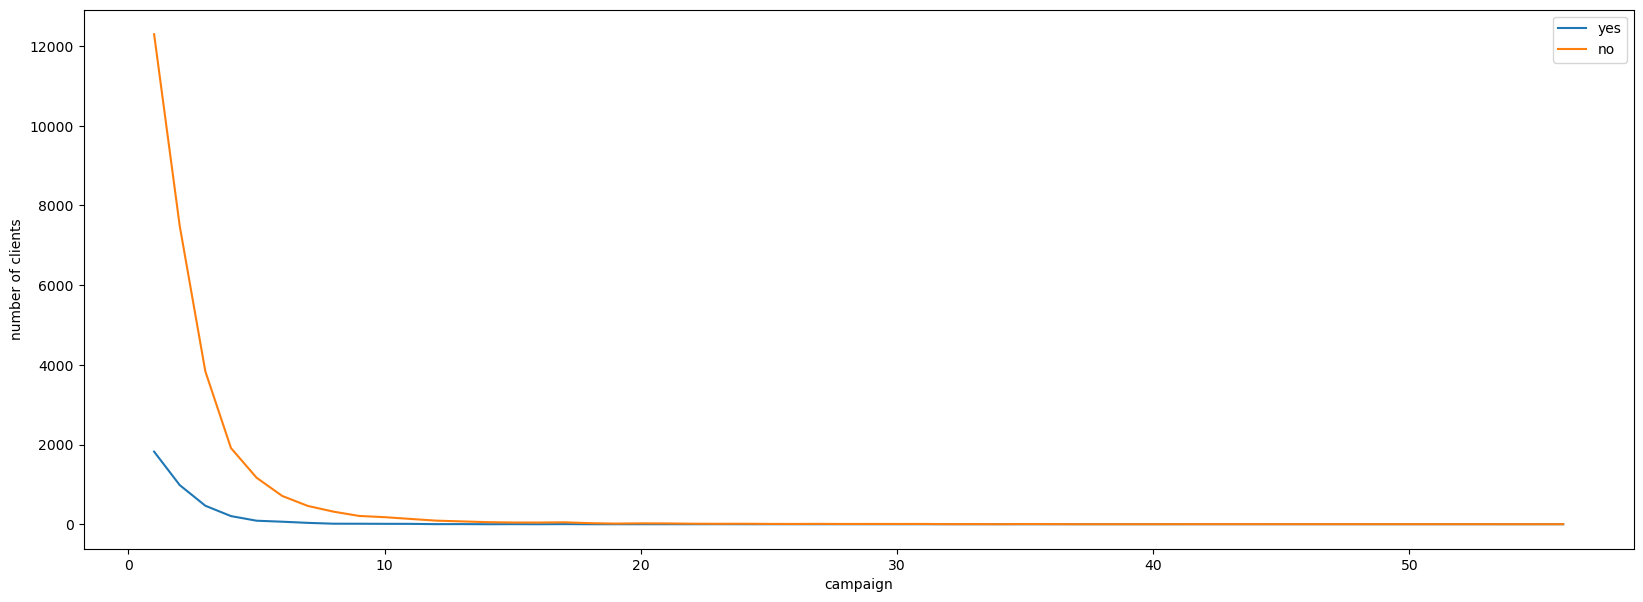

In [309]:
# Group the DataFrame by 'duration' and 'y' columns and count the frequency of each combination
grouped_data = df.groupby(['campaign', 'y']).size().reset_index(name='frequency')

# Pivot the data to have 'yes' and 'no' as separate columns
pivot_data = grouped_data.pivot(index='campaign', columns='y', values='frequency').fillna(0)

plt.figure(figsize=(20, 7))
# Plot the two lines representing the frequency of each duration for 'yes' and 'no'
plt.plot(pivot_data.index, pivot_data['yes'], label='yes')
plt.plot(pivot_data.index, pivot_data['no'], label='no')

# Add labels and legend
plt.xlabel('campaign')
plt.ylabel('number of clients')
plt.legend()

# Show the plot
plt.show()


Looking into the count of unique values in the campaign feature.

In [310]:
df['campaign'].value_counts()

1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: campaign, dtype: int64

Seeing unique values where 'yes' results in a value equal to or greater than 1 to see the relation of the campagin feature.

In [311]:
grouped_data = df.groupby('campaign')['y'].value_counts().unstack()
percentage = (grouped_data['yes'] / grouped_data['no']) *100
percentage = percentage.rename('Percentage')
result = pd.concat([grouped_data, percentage], axis=1)
result[result['yes'] >= 1]


,no,yes,Percentage
campaign,,,
1,12299.0,1822.0,14.814213
2,7487.0,982.0,13.116068
3,3836.0,464.0,12.095933
4,1912.0,204.0,10.669456
5,1167.0,88.0,7.540703
6,710.0,63.0,8.873239
7,459.0,34.0,7.407407
8,316.0,13.0,4.113924
9,208.0,12.0,5.769231


**Conclusion from the pdays feature**
- There are just 16 unique values that have a yes result equal to or greater than 1.
- It can be seen that there are four unique values that have a percentage greater than 10, which are one, two, three, and four. <br>
*Note that campaign is the number of contacts performed during this campaign and for this client.*

# Modelling and Evaluation

In [312]:
# Define a mapping dictionary
mapping = {'yes': 1, 'no': 0}

# To change values 
df['y'] = df['y'].map(mapping)

In [313]:
# One Hot-Encoding
df = pd.get_dummies(df)
df

,age,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,999,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36,120,2,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
32947,54,131,4,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32948,29,165,1,999,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Before doing feature engineering using all features

In [314]:
# Assign data for training and testing
X = df.drop('y', axis=1)
y= df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [315]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Train the classifier
rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [316]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Generate the classification report
report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

# Show the classification report
print('Classification Report:')
print(report)
# Show the confusion matrix
print('Confusion Matrix:')
print(confusion)
# Show the accuracy
print('Accuracy:')
print(accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5848
           1       0.62      0.36      0.45       742

    accuracy                           0.90      6590
   macro avg       0.77      0.66      0.70      6590
weighted avg       0.89      0.90      0.89      6590

Confusion Matrix:
[[5687  161]
 [ 478  264]]
Accuracy:
0.9030349013657056


### After doing feature engineering using four features which are duration, age, pdays, and campaign.

In [317]:
# Assign data for training and testing
X = df[['duration', 'age', 'pdays', 'campaign']]
y= df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [318]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Train the classifier
rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [319]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Generate the classification report
report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

# Show the classification report
print('Classification Report:')
print(report)
# Show the confusion matrix
print('Confusion Matrix:')
print(confusion)
# Show the accuracy
print('Accuracy:')
print(accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5848
           1       0.50      0.38      0.44       742

    accuracy                           0.89      6590
   macro avg       0.71      0.67      0.69      6590
weighted avg       0.88      0.89      0.88      6590

Confusion Matrix:
[[5568  280]
 [ 457  285]]
Accuracy:
0.8881638846737481


From above, by comparing the random forest model with and without feature engineering. The performance of the model with feature engineering is a little low. However, it can be assumed that the other model is overfitting. Therefore, we reduce the dimensionality of features to prevent overfitting, which is modeled with feature engineering.

### Model tuning

Using grid search for finding the best hyperparameters for Random forest classifier

In [320]:
# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'class_weight' : [None, 'balanced']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Obtain the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y, y_pred)
print("Accuracy of the Best Model: ", accuracy)


Best Parameters:  {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score:  0.9074355083459787
Accuracy of the Best Model:  0.9088012139605463


Creating a model for classification

In [321]:
# Create a Random Forest classifier
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42)
# Train the classifier
rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf.predict(X_test)

Evaluating the model using confusion matrix, classification report and accuracy

In [322]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Generate the classification report
report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

# Show the classification report
print('Classification Report:')
print(report)
# Show the confusion matrix
print('Confusion Matrix:')
print(confusion)
# Show the accuracy
print('Accuracy:')
print(accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5848
           1       0.63      0.37      0.47       742

    accuracy                           0.91      6590
   macro avg       0.78      0.67      0.71      6590
weighted avg       0.89      0.91      0.89      6590

Confusion Matrix:
[[5691  157]
 [ 469  273]]
Accuracy:
0.9050075872534142


After tuning hyperparameters, the result is pretty good, with high precision, recall, and f1-score. Moreover, the accuracy is approximately 0.9, which is very high. Nevertheless, the prediction of a yes result is a bad performance due to the imbalanced dataset.

##### POST-PROCESSING for imbalanced dataset.


After using tuned hyperparameters, plot the ROC graph to see the relationship between TPR and FPR.

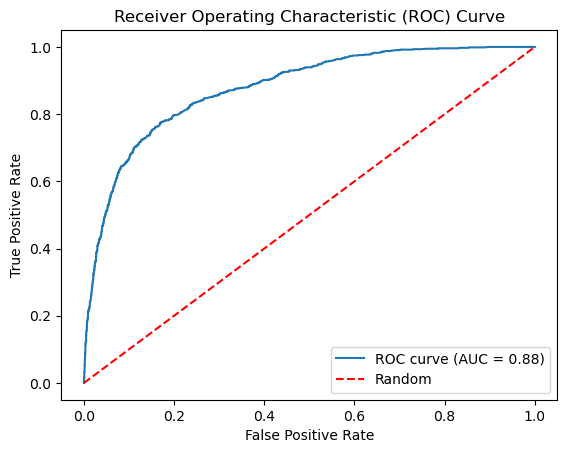

In [323]:
# Predict probabilities for the test set
y_scores = rf.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Compute AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Lastly, Find the best threshold from the ROC where the TPR maximizes and the TNR(1-FPR) minimizes.

In [324]:
# Find the best point on the ROC curve
best_index = (tpr - fpr).argmax()
best_threshold = thresholds[best_index]
best_tpr = tpr[best_index]
best_fpr = fpr[best_index]

print('Best Threshold:', best_threshold)
print('Best True Positive Rate:', best_tpr)
print('Best False Positive Rate:', best_fpr)

Best Threshold: 0.09823117138920782
Best True Positive Rate: 0.7749326145552561
Best False Positive Rate: 0.1694596443228454


Changing the predicted value by the best threshold in the following condition.

In [325]:
#CHANGE THRESHOLD 
thresholds = best_threshold
y_pred = (y_scores >= thresholds).astype(int)  # Apply the modified threshold

In [326]:
# AFTER CHANGE THRESHOLD
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Generate the classification report
report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

# Show the classification report
print('Classification Report:')
print(report)
# Show the confusion matrix
print('Confusion Matrix:')
print(confusion)
# Show the accuracy
print('Accuracy:')
print(accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      5848
           1       0.37      0.77      0.50       742

    accuracy                           0.82      6590
   macro avg       0.67      0.80      0.70      6590
weighted avg       0.90      0.82      0.85      6590

Confusion Matrix:
[[4857  991]
 [ 167  575]]
Accuracy:
0.8242792109256449


After doing post-processing, the recall of a yes result is higher, which equals 0.77.

**CONCLUSION from modelling and evaluation**
- In this project, we will aim for precision and recall of no result to find what the real no result is from the information we have by using a random forest model after tuning hyperparameters, and then we can add more intensive or something to them to give them a better chance to subscribe to a term deposit. After doing intensive work with clients, we can use another model, which is the model after post-processing, to see how many yes results there will be.

**CONCLUSION To make clients subscribe more and increase the revenue of the bank, there are two types of clients to be considered:**
- For old clients

  -contacting them in phone more than 650 seconds or contacting them via cellular. <br>
  
  -contacting more to the clients that less than 20 and more than 60 which are students and retired worker.<br>
  
  -contact them less than 5 times per person in the next campaign.<br>

  -clients whose credit is not in default are more likely to subscribe to a term deposit.
  
- For new clients<br>

  -approach to the clients that less than 20 and more than 60 which are students and retired worker.